# EE782 Advanced Machine Learning Project

## ASL Fingerspelling Recognition

Team Members
* 200070035 - Jaideep Kotani
* 200070052 - Ojas Patil
* 200070053 - Gnanendar Reddy

[Video Explanation](https://drive.google.com/file/d/1Z79Tp_EEjAYBarxHpJOU3DeuXjpkw7Zi/view?usp=drive_link)

[Folder to all files](https://drive.google.com/drive/folders/18hUpaxEV7Ja0EzpfxIGsbF0LoNaX9C6U?usp=sharing)

### Project Overview

This project aims to develop a robust and accurate American Sign Language (ASL) fingerspelling recognition system. By leveraging a comprehensive dataset of over three million fingerspelled characters collected from more than 100 Deaf signers, the goal is to create a model that enhances accessibility for the Deaf and Hard of Hearing (DHH) community. By enabling seamless fingerspelling recognition, this technology has the potential to revolutionize communication for DHH individuals, facilitating faster and more efficient interactions.

### Competition Overview

The competition challenges participants to develop a model capable of recognizing ASL fingerspelling captured via smartphone selfie cameras. This innovative approach addresses the limitations faced by the DHH community in accessing technologies like automated speech recognition (ASR) and machine translation, which are often not optimized for sign language users. By enabling fingerspelling recognition on mobile devices, this technology has the potential to bridge communication gaps and empower DHH individuals.

### Importance of Fingerspelling

Fingerspelling, a fundamental component of ASL, utilizes hand shapes to represent individual letters, enabling the communication of names, addresses, phone numbers, and other information typically entered on mobile devices. Notably, fingerspelling has the potential to surpass typing speeds on virtual keyboards, making it a viable and efficient method for text entry.

### Technological Implications

This project aligns with Google's mission to make information universally accessible and useful, focusing on creating AI-driven solutions that empower people, particularly those in the DHH community. By collaborating with the Deaf Professional Arts Network, Google is exploring scalable AI solutions for sign language recognition, aiming to enhance user experiences and bridge communication gaps.

### Potential Impact

The competition's outcomes could lead to significant advancements, enabling DHH individuals to utilize fingerspelling as an alternative to traditional keyboard input. This technology has far-reaching implications, potentially facilitating faster communication for web search, map directions, texting, and even the development of applications capable of translating sign language inputs into speech for smoother interactions between signers and non-signers.

# Preprocessing the Data

## Competition Dataset Analysis: Preprocessing Overview

The analysis of the competition dataset showcases the initial preprocessing steps applied to generate the X/y data for training purposes.

The outlined processing steps are as follows:

1. Identification of the dominant hand based on the highest count of non-empty hand frames.
2. Removal of all frames containing missing dominant hand coordinates.
3. Resizing the video to a consistent size of 256 frames.

### Final Improvements done

* Improved preprocessing pipeline ensuring successful submission.
* Exclusion of samples with a low frames-per-character ratio.
* Introduction of phrase categorization.


## References
* [TensorFlow ASLFR](https://www.kaggle.com/code/gusthema/asl-fingerspelling-recognition-w-tensorflow/notebook)
* [1st Place Solution - Training](https://www.kaggle.com/code/hoyso48/1st-place-solution-training)
* [1st Place Solution - Inference](https://www.kaggle.com/code/hoyso48/1st-place-solution-inference)
* [Fingerspelling Detection in ASL paper](https://openaccess.thecvf.com/content/CVPR2021/papers/Shi_Fingerspelling_Detection_in_American_Sign_Language_CVPR_2021_paper.pdf)
* [ASLFR using Hybrid Deep Learning](https://www.irjet.net/archives/V10/i9/IRJET-V10I906.pdf)
* [TopKAccuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/TopKCategoricalAccuracy)
* [Categorical Croosentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)
* [Learning Rate Scheduler](https://d2l.ai/chapter_optimization/lr-scheduler.html)
* [Levenshtein Distance](https://www.geeksforgeeks.org/introduction-to-levenshtein-distance/)

In [ ]:
# Importing essential libraries and modules like NumPy, Pandas, Matplotlib, Seaborn, TensorFlow,
# and others for data manipulation, visualization, machine learning, file handling, and system interactions.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn
import tensorflow as tf

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from pathlib import Path

import glob
import sys
import os
import math
import gc
import sys
import sklearn
import time
import json
import re

# Configuring Pandas to use tqdm for displaying progress bars during the apply() function.
tqdm.pandas()

## Character To Ordinal Encoding
Reading a JSON file containing character-to-ordinal mappings, loading it into a dictionary, displays the mappings in a DataFrame, and calculates the count of unique characters, finally printing out that count.

In [ ]:
# Read Character to Ordinal Encoding Mapping from a JSON file
with open('/kaggle/input/asl-fingerspelling/character_to_prediction_index.json') as json_file:
    CHAR2ORD = json.load(json_file)  # Load JSON content into CHAR2ORD dictionary

# Convert CHAR2ORD dictionary into a pandas Series and display it as a DataFrame with column name 'Ordinal Encoding'
display(pd.Series(CHAR2ORD).to_frame('Ordinal Encoding'))

,Ordinal Encoding
,0
!,1
#,2
$,3
%,4
&,5
',6
(,7
),8
*,9


In [ ]:
# Number of Unique Characters

# This line retrieves the length of the CHAR2ORD dictionary
# (assuming it's a dictionary containing character-to-ordinal mappings).
N_UNIQUE_CHARACTERS = len(CHAR2ORD)

# This line prints the number of unique characters calculated previously.
print(f'N_UNIQUE_CHARACTERS: {N_UNIQUE_CHARACTERS}')

N_UNIQUE_CHARACTERS: 59


# Global Config
The code initializes global configurations and calculates special tokens based on character mappings for sentence predictions

In [ ]:
import os  # Importing the os module for environment variables

# Checking if the notebook is running in interactive mode on Kaggle
IS_INTERACTIVE = os.environ['KAGGLE_KERNEL_RUN_TYPE'] == 'Interactive'

# Defining various percentiles for statistical analysis
PERCENTILES = [0.01, 0.10, 0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.999]

# Setting a global random seed for reproducibility in random processes
SEED = 42

# Number of frames to resize recordings to
N_TARGET_FRAMES = 128

# Global debug flag, used to toggle debugging mode in the code
DEBUG = False

# Flag for enabling fast processing, likely used to optimize execution speed
FAST = False

# Calculating the number of unique characters to predict, including special tokens
N_UNIQUE_CHARACTERSPAD_TOKEN = len(CHAR2ORD)  # Assumes CHAR2ORD is defined elsewhere
SOS_TOKEN = len(CHAR2ORD) + 1  # Indicating the Start Of Sentence token
EOS_TOKEN = len(CHAR2ORD) + 2  # Indicating the End Of Sentence token

# Plot Config

In [ ]:
# MatplotLib Global Settings
# Update Matplotlib's default settings to defaults
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 24

# Utils

In [ ]:
# Defining function named print_shape_dtype that takes in two parameters: l (a list of variables) and names (a list of names for these variables).
def print_shape_dtype(l, names):
    # Iterates through the elements of l and their corresponding names using the zip function.
    for e, n in zip(l, names):
        # Prints the name of the variable, its shape using the shape attribute, and its data type using the dtype attribute.
        print(f'{n} shape: {e.shape}, dtype: {e.dtype}')

# Read Train

In [ ]:
# Read Train DataFrame
if DEBUG:  # Check if the DEBUG flag is set (conditional statement)
    train = pd.read_csv('/kaggle/input/asl-fingerspelling/train.csv').head(5000)  # Read the first 5000 rows of the CSV file if DEBUG is True
else:  # If DEBUG is False
    train = pd.read_csv('/kaggle/input/asl-fingerspelling/train.csv')  # Read the entire CSV file

# Number Of Train Samples
N_SAMPLES = len(train)  # Count the number of samples in the train DataFrame
print(f'N_SAMPLES: {N_SAMPLES}')  # Print the number of samples

display(train.info())  # Display summary information about the train DataFrame
display(train.head())  # Display the first few rows of the train DataFrame

N_SAMPLES: 67208
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67208 entries, 0 to 67207
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            67208 non-null  object
 1   file_id         67208 non-null  int64 
 2   sequence_id     67208 non-null  int64 
 3   participant_id  67208 non-null  int64 
 4   phrase          67208 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


None

,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
3,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane
4,train_landmarks/5414471.parquet,5414471,1817123330,89,6920 northeast 661st road


# Phrase Type
Defining a function, "get_phrase_type", which categorizes input phrases as either phone numbers, URLs, or addresses based on specific patterns present in the text. It then applies this function to a DataFrame column named 'phrase' in variable 'train', assigning each phrase a corresponding 'phrase_type'.

In [ ]:
# Attempt to retrieve phrase type
# Could be used for pretraining or type specific inference
# *) Phone Number\
# *) URL
# *3) Address

def get_phrase_type(phrase):
    # Phone Number
    if re.match(r'^[\d+-]+$', phrase):
        return 'phone_number'
    # url
    elif any([substr in phrase for substr in ['www', '.', '/']]) and ' ' not in phrase:
        return 'url'
    # Address
    else:
        return 'address'

train['phrase_type'] = train['phrase'].apply(get_phrase_type)

# Add File Path

In [ ]:
# Getting the complete file path to file
def get_file_path(path):
    return f'/kaggle/input/asl-fingerspelling/{path}'

train['file_path'] = train['path'].apply(get_file_path)

# Phrase Processing
The code processes text data by extracting character-level information, identifying maximum character length, and organizing the data for easier retrieval using sequence IDs.

In [ ]:
# Splitting each phrase in the 'train' DataFrame into a tuple of characters and storing the result in a new column called 'phrase_char'
train['phrase_char'] = train['phrase'].apply(tuple)

# Calculating the length of characters for each phrase in the 'phrase_char' column and adding this information to a new column named 'phrase_char_len'
train['phrase_char_len'] = train['phrase_char'].apply(len)

# Determining the maximum character length among all the phrases in the dataset and storing it in the variable MAX_PHRASE_LENGTH
MAX_PHRASE_LENGTH = train['phrase_char_len'].max()
print(f'MAX_PHRASE_LENGTH: {MAX_PHRASE_LENGTH}')

# Creating a new DataFrame 'train_sequence_id' by setting the index of the 'train' DataFrame to the 'sequence_id' column, facilitating easier retrieval of data using sequence IDs
train_sequence_id = train.set_index('sequence_id')

MAX_PHRASE_LENGTH: 31


In [ ]:
# Phrase Character Length Statistics
# The comment above denotes the purpose or objective of this section of code.

# Display descriptive statistics for the 'phrase_char_len' column in the 'train' dataset
# 'train['phrase_char_len']' refers to the specific column 'phrase_char_len' in the 'train' dataset.
# 'describe()' computes summary statistics (count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, max).
# 'percentiles=PERCENTILES' - This might be a predefined variable containing specified percentiles to be included in the summary.
# 'to_frame()' converts the output to a DataFrame for better display.
# 'round(1)' rounds the values to one decimal place before displaying.

# The resulting summary statistics for 'phrase_char_len' are then displayed.


display(train['phrase_char_len'].describe(percentiles=PERCENTILES).to_frame().round(1))

,phrase_char_len
count,67208.0
mean,17.8
std,5.7
min,1.0
1%,8.0
5%,11.0
10%,12.0
25%,12.0
50%,17.0
75%,22.0


Generating a bar chart showing the occurrence frequency of different character lengths within a 'phrase_char_len' column in a dataset, allowing visualization of the distribution of character lengths in the phrases.

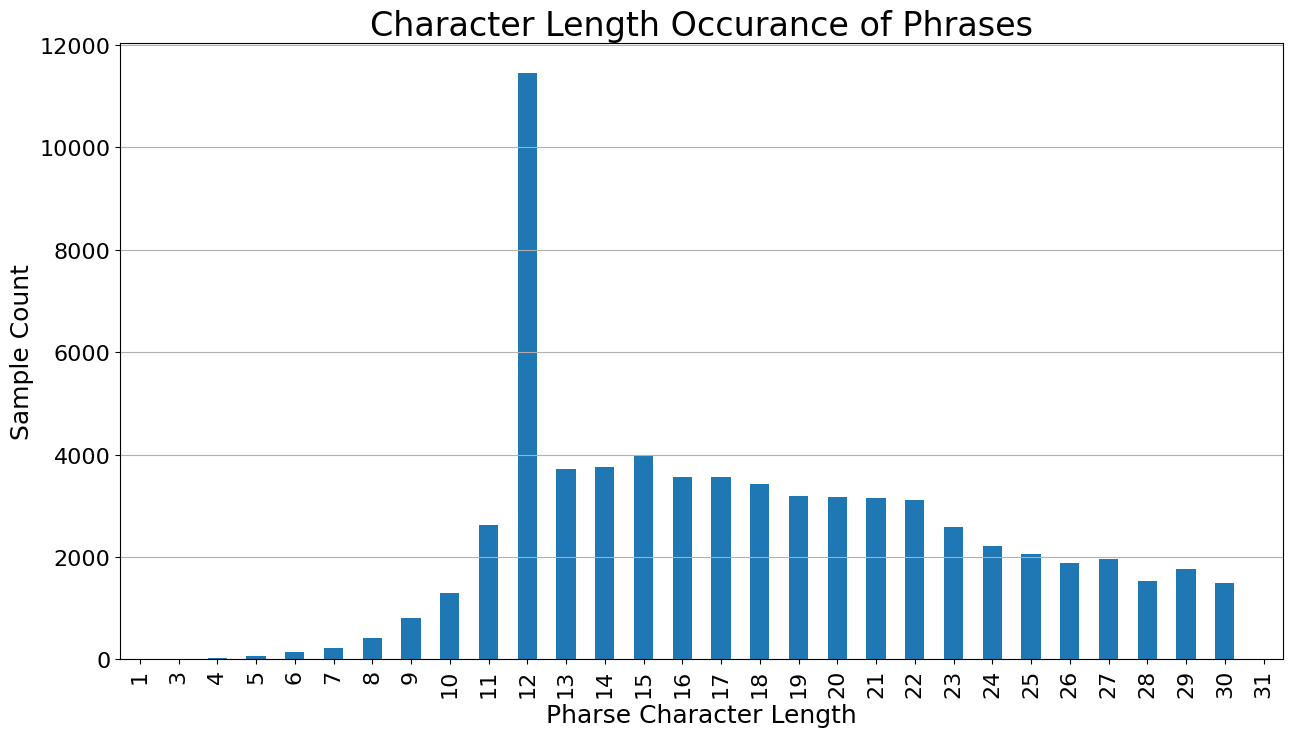

In [ ]:
# Character Count Occurance  # Comment describing the purpose of the code block

import matplotlib.pyplot as plt  # Importing the necessary library for plotting

plt.figure(figsize=(15,8))  # Creating a new figure with a specific size for the plot
plt.title('Character Length Occurance of Phrases')  # Setting the title for the plot

# Calculating the occurrence of different character lengths in the 'phrase_char_len' column and plotting as a bar chart
train['phrase_char_len'].value_counts().sort_index().plot(kind='bar')

# Setting limits for the x-axis based on the range of character lengths in the 'phrase_char_len' column
plt.xlim(-0.50, train['phrase_char_len'].max() - 1.50)

plt.xlabel('Pharse Character Length')  # Labeling the x-axis
plt.ylabel('Sample Count')  # Labeling the y-axis
plt.grid(axis='y')  # Adding gridlines along the y-axis
plt.show()  # Displaying the plot

# Find Unique Character
Extracting unique characters from phrases in a dataset, storing them in a sorted array, and calculates the total count of these unique characters in the dataset.

In [ ]:
# Use Set to keep track of unique characters in phrases
UNIQUE_CHARACTERS = set()  # Initializing an empty set to store unique characters

for phrase in tqdm(train['phrase_char']):  # Iterating through each phrase in the 'phrase_char' column of the 'train' dataset
    for c in phrase:  # Iterating through each character in the current phrase
        UNIQUE_CHARACTERS.add(c)  # Adding each unique character to the set

# Sorted Unique Character
UNIQUE_CHARACTERS = np.array(sorted(UNIQUE_CHARACTERS))  # Converting the set of unique characters into a sorted numpy array

# Number of Unique Characters
N_UNIQUE_CHARACTERS = len(UNIQUE_CHARACTERS)  # Calculating the total number of unique characters in the dataset
print(f'N_UNIQUE_CHARACTERS: {N_UNIQUE_CHARACTERS}')  # Displaying the number of unique characters

  0%|          | 0/67208 [00:00<?, ?it/s]

N_UNIQUE_CHARACTERS: 59


# Example Parquet File

In [ ]:
# Read the first Parquet file from the 'file_path' column in the 'train' DataFrame
example_parquet_df = pd.read_parquet(train['file_path'][0])

# Count the number of unique recordings in the DataFrame
print(f'# Unique Recordings: {example_parquet_df.index.nunique()}')

# Display the first few rows of the DataFrame to understand its structure
display(example_parquet_df.head())

# Unique Recordings: 1000


,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1816796431,0,0.710588,0.699951,0.705657,0.691768,0.699669,0.701980,0.709724,0.610405,0.712660,...,-0.245855,-0.269148,-0.129743,-0.251501,-0.278687,-0.266530,-0.152852,-0.257519,-0.275822,-0.266876
1816796431,1,0.709525,0.697582,0.703713,0.691016,0.697576,0.700467,0.709796,0.616540,0.713729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816796431,2,0.711059,0.700858,0.706272,0.693285,0.700825,0.703319,0.711549,0.615606,0.715143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816796431,3,0.712799,0.702518,0.707840,0.694899,0.702445,0.704794,0.712483,0.625044,0.715677,...,-0.370770,-0.408097,-0.185217,-0.325494,-0.343373,-0.328294,-0.203126,-0.315719,-0.326104,-0.314282
1816796431,4,0.712349,0.705451,0.709918,0.696006,0.705180,0.706928,0.712685,0.614356,0.714875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Video Statistics
Calculating the number of unique frames per sequence in a selection of parquet files from a 'train' dataset, storing these counts in an array for further analysis or processing.

In [ ]:
# Number of parquet chunks to analyze
N = 5 if IS_INTERACTIVE else 25  # Set the value of N based on interactivity

# List to store the count of unique frames in each recording
N_UNIQUE_FRAMES = []

# Extract unique file paths from the 'train' DataFrame
UNIQUE_FILE_PATHS = pd.Series(train['file_path'].unique())

# Loop through a sample of unique file paths and process each parquet file
for idx, file_path in enumerate(tqdm(UNIQUE_FILE_PATHS.sample(N, random_state=SEED))):
    # Read data from the parquet file into a DataFrame
    df = pd.read_parquet(file_path)

    # Group data by 'sequence_id' and count the number of unique frames in each group
    for group, group_df in df.groupby('sequence_id'):
        N_UNIQUE_FRAMES.append(group_df['frame'].nunique())  # Append the count of unique frames

# Convert the list of counts to a Numpy array
N_UNIQUE_FRAMES = np.array(N_UNIQUE_FRAMES)  # Convert to Numpy Array

  0%|          | 0/5 [00:00<?, ?it/s]

Generating descriptive statistics and a histogram plot for the distribution of unique frames, visualizing the frequency distribution of these frames and their characteristics.

,Value
count,4996
mean,160
std,83
min,1
1%,6
5%,36
10%,68
25%,104
50%,150
75%,206


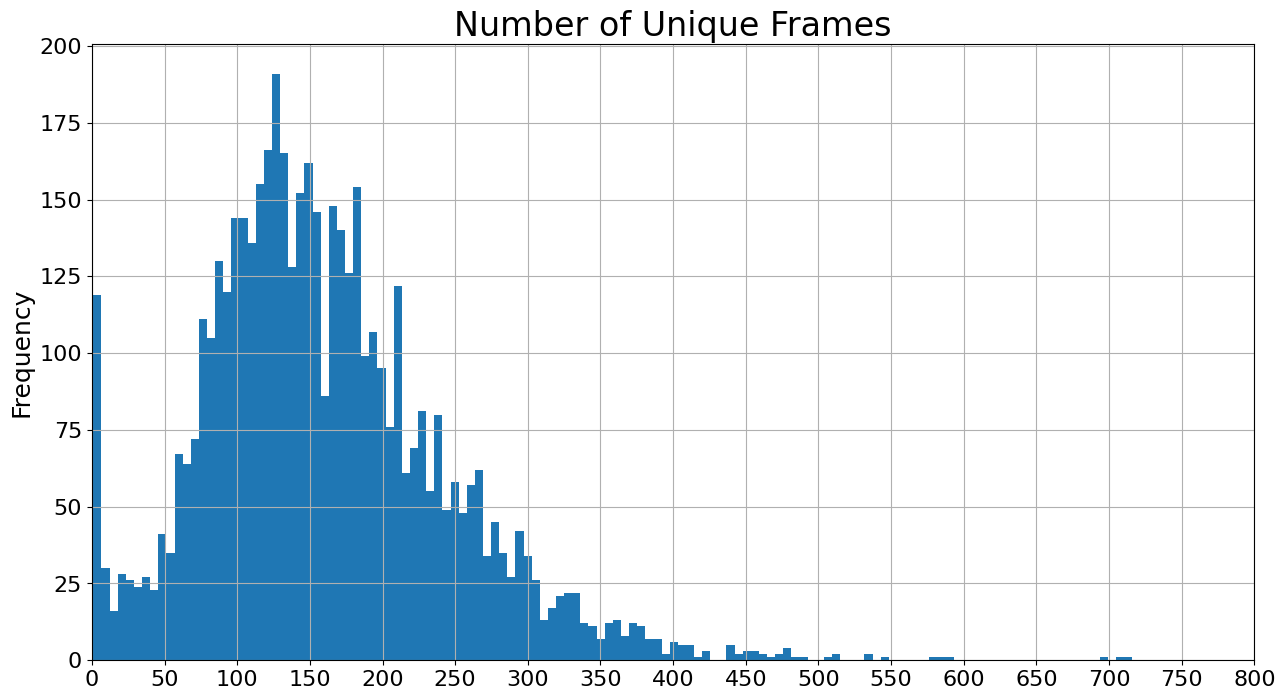

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Display statistics of the number of unique frames
# Use pd.Series to create a series from N_UNIQUE_FRAMES
# Describe the series and format the output as a DataFrame with given percentiles
display(pd.Series(N_UNIQUE_FRAMES).describe(percentiles=PERCENTILES).to_frame('Value').astype(int))

# Create a new figure for plotting
plt.figure(figsize=(15,8))

# Set the title for the plot
plt.title('Number of Unique Frames', size=24)

# Create a histogram plot for the distribution of unique frames
# Use pd.Series to plot the data, specifying 'hist' as the plot kind and 128 bins
pd.Series(N_UNIQUE_FRAMES).plot(kind='hist', bins=128)

# Add gridlines to the plot
plt.grid()

# Calculate the maximum x-axis limit for the plot
xlim = math.ceil(plt.xlim()[1])

# Set the x-axis limits to start from 0 and end at the calculated xlim
plt.xlim(0, xlim)

# Set x-axis ticks at intervals of 50 starting from 0 up to xlim+50
plt.xticks(np.arange(0, xlim+50, 50))

# Display the plot
plt.show()

Generating a waterfall plot showing the percentage of samples containing a certain number of unique frames, derived from the `N_UNIQUE_FRAMES` data, allowing visualization and analysis of frame uniqueness distribution in a dataset.

  0%|          | 0/401 [00:00<?, ?it/s]

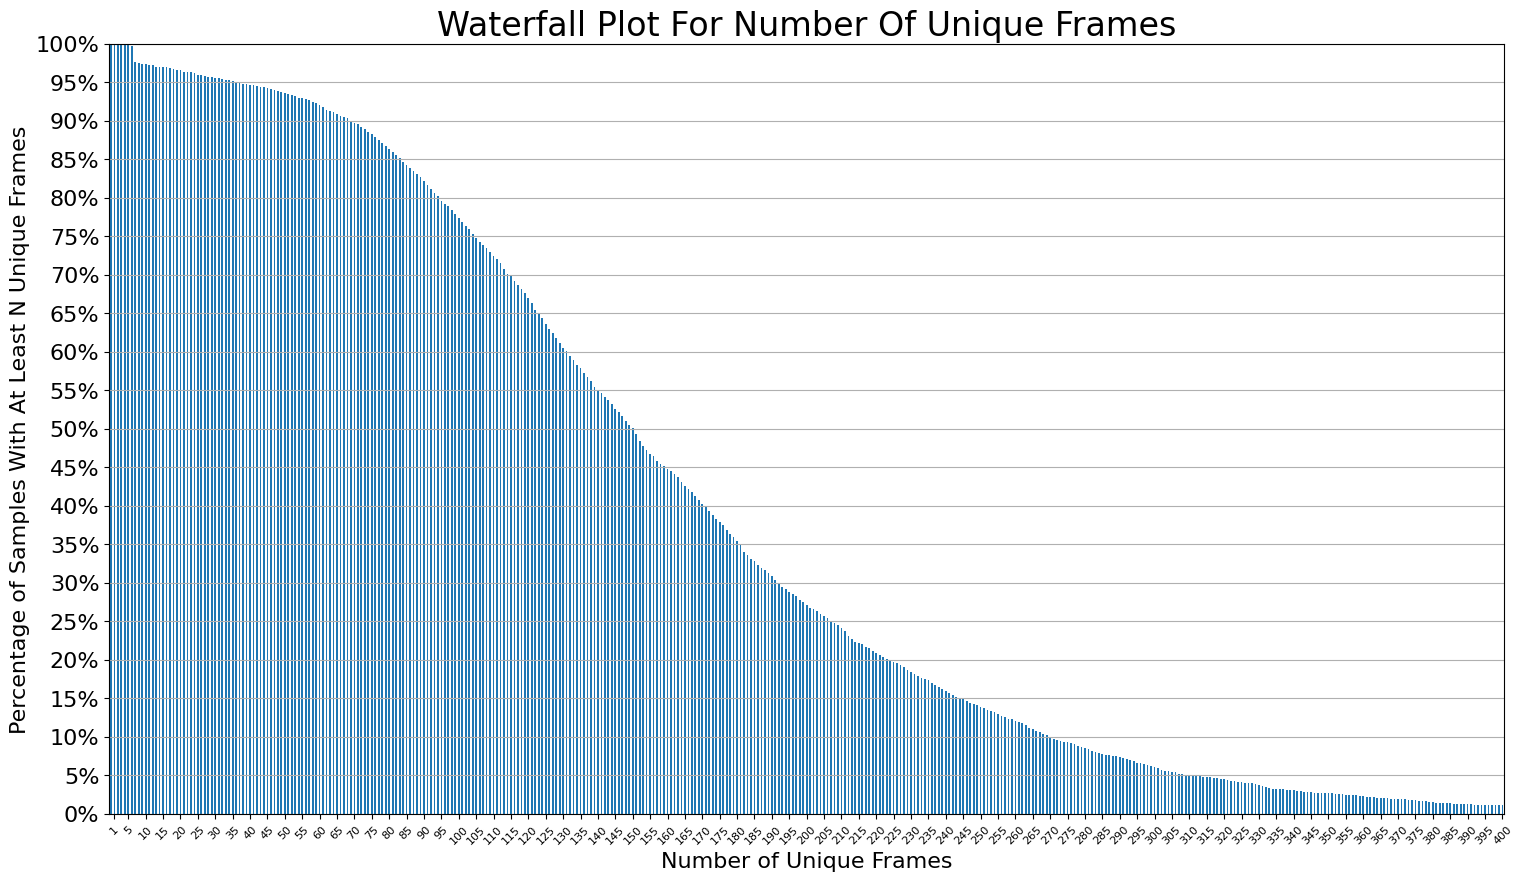

In [ ]:
# Create an empty list to store the number of unique frames in a waterfall plot
N_UNIQUE_FRAMES_WATERFALL = []

# Define the maximum number of unique frames to consider
N_MAX_UNIQUE_FRAMES = 400

# Compute the percentage of samples with at least 'n' unique frames in a waterfall plot
for n in tqdm(range(0, N_MAX_UNIQUE_FRAMES + 1)):
    # Calculate the percentage and append it to the N_UNIQUE_FRAMES_WATERFALL list
    N_UNIQUE_FRAMES_WATERFALL.append(sum(N_UNIQUE_FRAMES >= n) / len(N_UNIQUE_FRAMES) * 100)

# Set up the plot
plt.figure(figsize=(18, 10))
plt.title('Waterfall Plot For Number Of Unique Frames')

# Create a bar plot representing the waterfall plot
pd.Series(N_UNIQUE_FRAMES_WATERFALL).plot(kind='bar')

# Add gridlines along the y-axis
plt.grid(axis='y')

# Set x-axis ticks at specified intervals with rotation and font size
plt.xticks([1] + np.arange(5, N_MAX_UNIQUE_FRAMES + 5, 5).tolist(), size=8, rotation=45)

# Label x-axis and y-axis
plt.xlabel('Number of Unique Frames', size=16)
plt.ylabel('Percentage of Samples With At Least N Unique Frames', size=16)

# Set y-axis ticks at intervals of 5%, ranging from 0% to 100%
plt.yticks(np.arange(0, 100 + 5, 5), [f'{i}%' for i in range(0, 100 + 5, 5)])
plt.ylim(0, 100)  # Set the y-axis limits from 0% to 100%

# Display the plot
plt.show()

# Landmark Indices
Identifying column indices and names in a DataFrame based on specified positive and negative word conditions, allowing the retrieval of matching column indices, names, or both as needed.

In [ ]:
def get_idxs(df, words_pos, words_neg=[], ret_names=True, idxs_pos=None):
    idxs = []  # Initialize an empty list to store column indices that match the conditions
    names = []  # Initialize an empty list to store column names that match the conditions

    # Iterate through positive words
    for w in words_pos:
        # Iterate through DataFrame columns
        for col_idx, col in enumerate(example_parquet_df.columns):
            # Exclude Non Landmark Columns
            if col in ['frame']:  # If the column is 'frame', skip it
                continue

            col_idx = int(col.split('_')[-1])  # Extract numerical part from the column name
            # Check if column name contains the current positive word and meets other conditions
            if (w in col) and (idxs_pos is None or col_idx in idxs_pos) and all([w not in col for w in words_neg]):
                idxs.append(col_idx)  # Append the index to the list of matching indices
                names.append(col)  # Append the column name to the list of matching names

    # Convert the lists to Numpy arrays
    idxs = np.array(idxs)
    names = np.array(names)

    # Returns either both column indices and names
    if ret_names:
        return idxs, names  # Return both indices and names
    # Or only column indices
    else:
        return idxs  # Return only indices

We are managing specific indices related to different body parts and facial landmarks within a dataset, focusing on X and Y coordinates while omitting the Z-axis information.

In [ ]:
# Define an array of indices corresponding to specific facial landmarks on the lips
LIPS_LANDMARK_IDXS = np.array([
        61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
        291, 146, 91, 181, 84, 17, 314, 405, 321, 375,
        78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
        95, 88, 178, 87, 14, 317, 402, 318, 324, 308,
    ])

# Get indices and names for specific body parts without the Z-axis from raw data
LEFT_HAND_IDXS0, LEFT_HAND_NAMES0 = get_idxs(example_parquet_df, ['left_hand'], ['z'])
RIGHT_HAND_IDXS0, RIGHT_HAND_NAMES0 = get_idxs(example_parquet_df, ['right_hand'], ['z'])
# Extract indices and names for facial landmarks without the Z-axis using pre-defined lip indices
LIPS_IDXS0, LIPS_NAMES0 = get_idxs(example_parquet_df, ['face'], ['z'], idxs_pos=LIPS_LANDMARK_IDXS)
# Concatenate names of left hand, right hand, and lips landmarks
COLUMNS0 = np.concatenate((LEFT_HAND_NAMES0, RIGHT_HAND_NAMES0, LIPS_NAMES0))
# Calculate the total number of columns
N_COLS0 = len(COLUMNS0)
# Define the number of dimensions to use (only X/Y axes)
N_DIMS0 = 2

# Display the total number of columns used
print(f'N_COLS0: {N_COLS0}')

N_COLS0: 164


Identifying specific columns related to the left hand, right hand, and lips within a dataset based on their names, setting the number of columns, and then extracts indices and names for 'x' and 'y' coordinates specifically related to the left hand from the dataset.

In [ ]:
# Finding indices of columns related to the left hand within the subset of the dataframe
LEFT_HAND_IDXS = np.argwhere(np.isin(COLUMNS0, LEFT_HAND_NAMES0)).squeeze()

# Finding indices of columns related to the right hand within the subset of the dataframe
RIGHT_HAND_IDXS = np.argwhere(np.isin(COLUMNS0, RIGHT_HAND_NAMES0)).squeeze()

# Finding indices of columns related to the lips within the subset of the dataframe
LIPS_IDXS = np.argwhere(np.isin(COLUMNS0, LIPS_NAMES0)).squeeze()

# Setting the number of columns in the dataset to a predefined value
N_COLS = N_COLS0

# Specifying the number of dimensions used (only X and Y axes)
N_DIMS = 2

# Displaying the number of columns in the dataset
print(f'N_COLS: {N_COLS}')

N_COLS: 164


In [ ]:
# Indices in processed data by axes with only dominant hand

# Extracting indices of 'x' coordinates in LEFT_HAND_NAMES0
HAND_X_IDXS = np.array(
        [idx for idx, name in enumerate(LEFT_HAND_NAMES0) if 'x' in name]
    ).squeeze()

# Extracting indices of 'y' coordinates in LEFT_HAND_NAMES0
HAND_Y_IDXS = np.array(
        [idx for idx, name in enumerate(LEFT_HAND_NAMES0) if 'y' in name]
    ).squeeze()

# Names corresponding to 'x' coordinates in LEFT_HAND_NAMES0
HAND_X_NAMES = LEFT_HAND_NAMES0[HAND_X_IDXS]

# Names corresponding to 'y' coordinates in LEFT_HAND_NAMES0
HAND_Y_NAMES = LEFT_HAND_NAMES0[HAND_Y_IDXS]

# Number Of Non-NaN Frames
Defining a custom TensorFlow layer aimed at preprocessing data for TFLite inference, handling NaN values, extracting specific portions of the input, and filtering the data based on certain conditions for further processing within a neural network model.

In [ ]:
# Tensorflow layer to process data in TFLite
# Data needs to be processed in the model itself, so we can not use Python

# Defines a custom TensorFlow layer to preprocess data for TFLite inference
class PreprocessLayerNonNaN(tf.keras.layers.Layer):
    def __init__(self):
        super(PreprocessLayerNonNaN, self).__init__()

    # Decorates the call method to specify input signature for TensorFlow Graph mode
    @tf.function(
        input_signature=(tf.TensorSpec(shape=[None,N_COLS0], dtype=tf.float32),),
    )
    # Function to preprocess data
    def call(self, data0):
        # Fill NaN Values With 0
        # Replaces NaN values in the input data with 0.0
        data = tf.where(tf.math.is_nan(data0), 0.0, data0)

        # Hacky
        # Not entirely clear what this line does or why it's labeled as 'Hacky'
        data = data[None]

        # Empty Hand Frame Filtering
        # Extracts specific portions ('hands') of the data and performs manipulations
        hands = tf.slice(data, [0,0,0], [-1, -1, 84])
        hands = tf.abs(hands)
        mask = tf.reduce_sum(hands, axis=2)
        mask = tf.not_equal(mask, 0)
        # Filters data based on the mask created
        data = data[mask][None]
        # Removes the added dimension from the data
        data = tf.squeeze(data, axis=[0])

        return data

# Creates an instance of the PreprocessLayerNonNaN class
preprocess_layer_non_nan = PreprocessLayerNonNaN()

Retrieving unique file paths from a DataFrame column, selects a number of paths to analyze based on certain conditions, reads data from Parquet files, processes the data, and creates a DataFrame with counts of non-NaN frames for each file path.

In [ ]:
# Getting unique file paths from the 'train' DataFrame's 'file_path' column
UNIQUE_FILE_PATHS = pd.Series(train['file_path'].unique())

# Determining the number of parquet chunks to analyze based on conditions
N = 5 if (IS_INTERACTIVE or FAST) else len(UNIQUE_FILE_PATHS)

# Initializing a list to store the count of non-NaN frames in recordings
N_NON_NAN_FRAMES = []

# Looping through a sample of unique file paths and processing their data
for idx, file_path in enumerate(tqdm(UNIQUE_FILE_PATHS.sample(N, random_state=SEED))):
    # Reading data from a Parquet file into a DataFrame
    df = pd.read_parquet(file_path)

    # Grouping the DataFrame by 'sequence_id' and processing non-NaN frames
    for group, group_df in df.groupby('sequence_id'):
        frames = preprocess_layer_non_nan(group_df[COLUMNS0].values).numpy()
        # Appending the count of non-NaN frames to the list
        N_NON_NAN_FRAMES.append(len(frames))

# Converting the list of counts to a Pandas Series and then to a DataFrame
N_NON_NAN_FRAMES = pd.Series(N_NON_NAN_FRAMES).to_frame('# Frames')

  0%|          | 0/5 [00:00<?, ?it/s]

Conducting statistical analysis and visualizes the distribution of non-NaN frames in hand-coordinate videos.

,# Frames
count,4996
mean,94
std,74
min,1
1%,1
5%,5
10%,11
25%,35
50%,82
75%,135


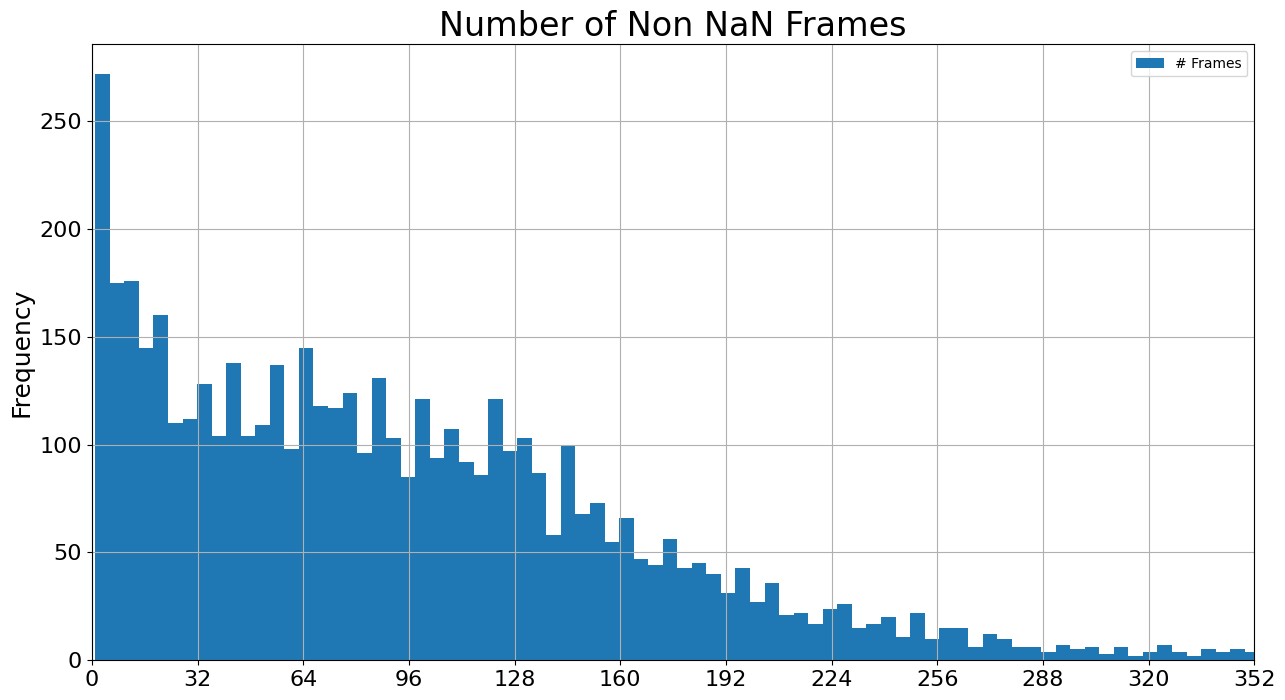

In [ ]:
# Display statistical summary (count, mean, std, min, 1st quartile, median, 3rd quartile, max)
# of the number of frames in each video with hand coordinates,
# using the specified percentiles.
display(N_NON_NAN_FRAMES.describe(percentiles=PERCENTILES).astype(int))

# Plot a histogram representing the distribution of the number of non-NaN frames.
# The histogram is divided into 128 bins and visualized in a 15x8 figure.
N_NON_NAN_FRAMES.plot(kind='hist', bins=128, figsize=(15,8))

# Set the title of the histogram.
plt.title('Number of Non NaN Frames', size=24)

# Add gridlines to the histogram.
plt.grid()

# Set the x-axis limit based on the 99th percentile of the number of non-NaN frames.
xlim = np.percentile(N_NON_NAN_FRAMES, 99)
plt.xlim(0, xlim)

# Set the x-axis ticks at intervals of 32 up to the calculated limit.
plt.xticks(np.arange(0, xlim+32, 32))

# Display the histogram.
plt.show()

# Tensorflow Preprocess Layer
Defining a TensorFlow layer (`PreprocessLayer`) responsible for processing input data for a TFLite model. It involves handling NaN values, reshaping, filtering empty hand frames, padding zeros, downsampling frames, and squeezing dimensions to prepare the data for model input, demonstrated with input shape printing and NaN count analysis.

In [ ]:
# Tensorflow layer to process data in TFLite
# Data needs to be processed in the model itself, so we can not use Python

class PreprocessLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PreprocessLayer, self).__init__()

    @tf.function(
        input_signature=(tf.TensorSpec(shape=[None,N_COLS0], dtype=tf.float32),),
    )
    def call(self, data0, resize=True):
        # Fill NaN Values With 0
        data = tf.where(tf.math.is_nan(data0), 0.0, data0)

        # Hacky - reshaping the data
        data = data[None]

        # Empty Hand Frame Filtering
        # Selecting a specific slice of the data and performing operations
        hands = tf.slice(data, [0,0,0], [-1, -1, 84])
        hands = tf.abs(hands)
        mask = tf.reduce_sum(hands, axis=2)
        mask = tf.not_equal(mask, 0)
        data = data[mask][None]

        # Pad Zeros to adjust frames
        N_FRAMES = len(data[0])
        if N_FRAMES < N_TARGET_FRAMES:
            data = tf.concat((
                data,
                tf.zeros([1,N_TARGET_FRAMES-N_FRAMES,N_COLS], dtype=tf.float32)
            ), axis=1)
        # Downsample the frames
        data = tf.image.resize(
            data,
            [1, N_TARGET_FRAMES],
            method=tf.image.ResizeMethod.BILINEAR,
        )

        # Squeeze Batch Dimension
        data = tf.squeeze(data, axis=[0])

        return data

# Initialize the PreprocessLayer
preprocess_layer = PreprocessLayer()

# Get inputs from group_df and take the first entry
inputs = group_df[COLUMNS0].values
inputs = inputs[:1]

# Process frames using the preprocess_layer
frames = preprocess_layer(inputs)

# Print the shapes of inputs and frames, along with NaN count in frames
print(f'inputs shape: {inputs.shape}')
print(f'frames shape: {frames.shape}, NaN count: {np.isnan(frames).sum()}')

inputs shape: (1, 164)
frames shape: (128, 164), NaN count: 0


# Create X/Y
The code initializes arrays:
1. `X` as a zero-filled array with dimensions representing samples, target frames, and columns.
2. `y` as an array filled with a specific value to represent a pad token in the target, and `y_phrase_type` as an empty array to store phrase types, enabling storage of arbitrary Python objects.

In [ ]:
# Creating an array of zeros with dimensions N_SAMPLES (number of samples), N_TARGET_FRAMES (target frames), and N_COLS (number of columns)
X = np.zeros([N_SAMPLES, N_TARGET_FRAMES, N_COLS], dtype=np.float32)

# Creating an array filled with a specific value (N_UNIQUE_CHARACTERS) with dimensions N_SAMPLES and N_TARGET_FRAMES, using dtype=np.int8
# This specific value, 59 in this case, represents a pad token in the ordinally encoded target
y = np.full(shape=[N_SAMPLES, N_TARGET_FRAMES], fill_value=N_UNIQUE_CHARACTERS, dtype=np.int8)

# Creating an empty array with the shape of N_SAMPLES to hold phrase types, using dtype=object to allow for storing arbitrary Python objects
y_phrase_type = np.empty(shape=[N_SAMPLES], dtype=object)

Processing unique file paths from a DataFrame, reads Parquet files, creates subsets of data for a TFLite model from the first 10 files, and tracks frame counts for each character sequence within the files.

In [ ]:
# Creating a series of unique file paths from the 'train' dataframe
UNIQUE_FILE_PATHS = pd.Series(train['file_path'].unique())
N_UNIQUE_FILE_PATHS = len(UNIQUE_FILE_PATHS)  # Counting the number of unique file paths

row = 0  # Initializing row counter
count = 0  # Initializing count variable
Path('train_landmark_subsets').mkdir(parents=True, exist_ok=True)  # Creating a directory for storing subsets of data
N_FRAMES_PER_CHARACTER = []  # Creating an empty list to hold the number of frames per character
MIN_NUM_FRAMES_PER_CHARACTER = 4  # Defining the minimum number of frames per character
VALID_IDXS = []  # Creating an empty list to store valid indices

# Iterating through unique file paths
for idx, file_path in enumerate(tqdm(UNIQUE_FILE_PATHS)):
    print(f'Processed {idx:02d}/{N_UNIQUE_FILE_PATHS} parquet files')  # Logging progress
    df = pd.read_parquet(file_path)  # Reading a parquet file

    name = file_path.split('/')[-1]  # Extracting file name from the file path
    if idx < 10:
        df[COLUMNS0].to_parquet(f'train_landmark_subsets/{name}', engine='pyarrow', compression='zstd')  # Saving a subset of data

    # Iterating through groups in the dataframe
    for group, group_df in df.groupby('sequence_id'):
        n_frames_per_character = len(group_df[COLUMNS0].values) / len(train_sequence_id.loc[group, 'phrase_char'])  # Calculating frames per character
        N_FRAMES_PER_CHARACTER.append(n_frames_per_character)  # Appending frames per character to the list

        # Checking if frames per character is below the minimum threshold
        if n_frames_per_character < MIN_NUM_FRAMES_PER_CHARACTER:
            count += 1  # Incrementing count if below threshold
            continue
        else:
            VALID_IDXS.append(count)  # Adding valid index if above threshold
            count += 1

        frames = preprocess_layer(group_df[COLUMNS0].values)  # Preprocessing frames
        assert frames.ndim == 2  # Assertion for frame dimensions

        X[row] = frames  # Assigning processed frames to X
        phrase_char = train_sequence_id.loc[group, 'phrase_char']  # Extracting phrase characters
        for col, char in enumerate(phrase_char):  # Iterating through characters
            y[row, col] = CHAR2ORD.get(char)  # Assigning ordinal encoding of characters to y
        y[row, col+1] = EOS_TOKEN  # Adding an end-of-sequence token to y
        y_phrase_type[row] = train_sequence_id.loc[group, 'phrase_type']  # Assigning phrase type
        row += 1  # Incrementing row count

    gc.collect()  # Performing garbage collection for memory cleanup

  0%|          | 0/68 [00:00<?, ?it/s]

Processed 00/68 parquet files
Processed 01/68 parquet files
Processed 02/68 parquet files
Processed 03/68 parquet files
Processed 04/68 parquet files
Processed 05/68 parquet files
Processed 06/68 parquet files
Processed 07/68 parquet files
Processed 08/68 parquet files
Processed 09/68 parquet files
Processed 10/68 parquet files
Processed 11/68 parquet files
Processed 12/68 parquet files
Processed 13/68 parquet files
Processed 14/68 parquet files
Processed 15/68 parquet files
Processed 16/68 parquet files
Processed 17/68 parquet files
Processed 18/68 parquet files
Processed 19/68 parquet files
Processed 20/68 parquet files
Processed 21/68 parquet files
Processed 22/68 parquet files
Processed 23/68 parquet files
Processed 24/68 parquet files
Processed 25/68 parquet files
Processed 26/68 parquet files
Processed 27/68 parquet files
Processed 28/68 parquet files
Processed 29/68 parquet files
Processed 30/68 parquet files
Processed 31/68 parquet files
Processed 32/68 parquet files
Processed 

In [ ]:
# rows denotes the number of samples with frames/characters above a certain threshold
print(f'row: {row}, count: {count}')  # Displaying the current row number and the count value for the sample

row: 61955, count: 67208


In [ ]:
# Displaying the target value of the example, specifically the first element, using string formatting
print(f'Example Target: {y[0]}')  # y is a variable containing target values, and [0] accesses the first element

Example Target: [18  0 34 49 36 36 42 39 46 52 50 36 61 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59]


In [ ]:
# Filter X and y based on the value of 'row'
X = X[:row]  # Select the first 'row' elements of X
y = y[:row]  # Select the first 'row' elements of y to correspond with the filtered X

Saving arrays X and y as 'X.npy' and 'y.npy', then splitting the data into training and validation sets based on participant IDs, saving these subsets as 'X_train.npy', 'y_train.npy', 'X_val.npy', and 'y_val.npy'. It verifies the split by printing the intersection of participant IDs between the training and validation sets and displays the sizes of the training and validation sets.

In [ ]:
# Save X/y
np.save('X.npy', X)  # Save array X as 'X.npy' file
np.save('y.npy', y)  # Save array y as 'y.npy' file

# Save Validation
splitter = GroupShuffleSplit(test_size=0.10, n_splits=2, random_state=SEED)  # Define a splitter for data with a 10% test size and 2 splits, using a specific random state
PARTICIPANT_IDS = train['participant_id'].values[VALID_IDXS]  # Extract participant IDs from the 'train' dataset based on VALID_IDXS
train_idxs, val_idxs = next(splitter.split(X, y, groups=PARTICIPANT_IDS))  # Split the data into training and validation indices

# Save Train
np.save('X_train.npy', X[train_idxs])  # Save a portion of array X for training as 'X_train.npy'
np.save('y_train.npy', y[train_idxs])  # Save a portion of array y for training as 'y_train.npy'

# Save Validation
np.save('X_val.npy', X[val_idxs])  # Save a portion of array X for validation as 'X_val.npy'
np.save('y_val.npy', y[val_idxs])  # Save a portion of array y for validation as 'y_val.npy'

# Verify Train/Val is correctly split by participant ID
print(f'Patient ID Intersection Train/Val: {set(PARTICIPANT_IDS[train_idxs]).intersection(PARTICIPANT_IDS[val_idxs])}')  # Print the intersection of participant IDs between training and validation sets

# Train/Val Sizes
print(f'# Train Samples: {len(train_idxs)}, # Val Samples: {len(val_idxs)}')  # Print the number of samples in the training and validation sets

Patient ID Intersection Train/Val: set()
# Train Samples: 54719, # Val Samples: 7236


# Number of Frames Per Character
Taking data on the number of frames per character, converting it into a Pandas Series, which displays descriptive statistics along with a histogram plot to visualize the distribution and variation in the number of frames per phrase character, focusing on the 99th percentile.

,Value
count,67208.00
mean,9.02
std,3.84
min,0.03
1%,0.33
5%,2.38
10%,4.62
25%,6.75
50%,8.86
75%,11.18


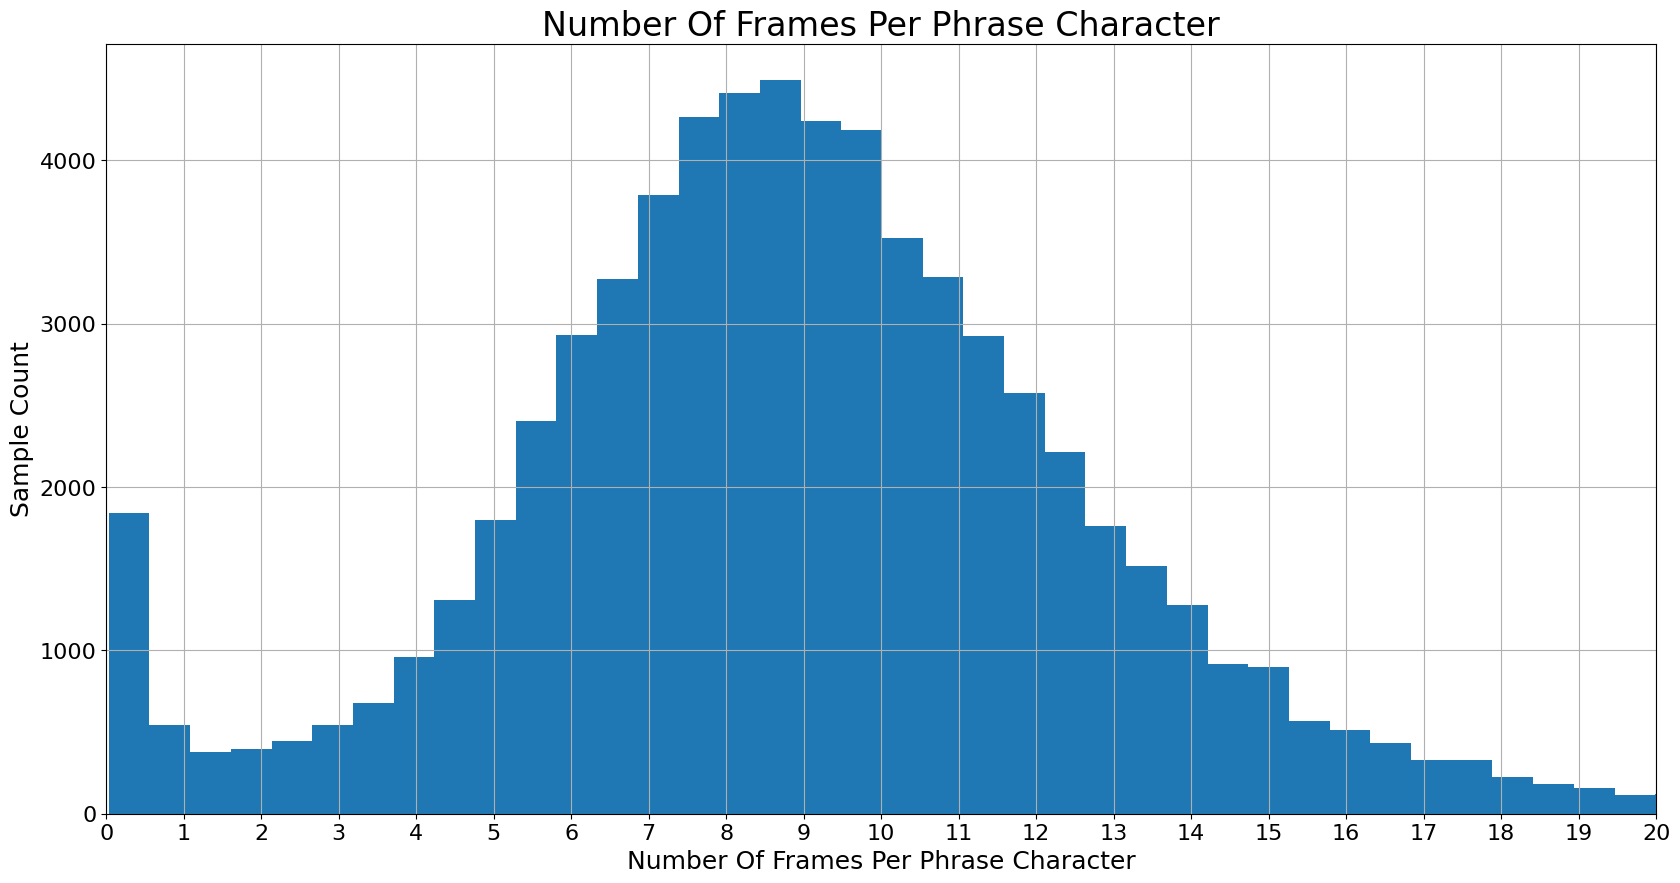

In [ ]:
# Create a Pandas Series from the N_FRAMES_PER_CHARACTER data
N_FRAMES_PER_CHARACTER_S = pd.Series(N_FRAMES_PER_CHARACTER)

# Display descriptive statistics of the Series, rounded to 2 decimal places
display(N_FRAMES_PER_CHARACTER_S.describe(percentiles=PERCENTILES).to_frame('Value').round(2))

# Create a new plot with specified figure size
plt.figure(figsize=(20,10))

# Set the title of the plot
plt.title('Number Of Frames Per Phrase Character')

# Plot a histogram of the data with 128 bins
N_FRAMES_PER_CHARACTER_S.plot(kind='hist', bins=128)

# Calculate the value for the 99th percentile
p99 = math.ceil(np.percentile(N_FRAMES_PER_CHARACTER_S, 99))

# Set the x-axis ticks from 0 to the 99th percentile, incrementing by 1
plt.xticks(np.arange(0, p99+1, 1))

# Set the x-axis limit from 0 to the 99th percentile
plt.xlim(0, p99)

# Set the x-axis label
plt.xlabel('Number Of Frames Per Phrase Character')

# Set the y-axis label
plt.ylabel('Sample Count')

# Display gridlines on the plot
plt.grid()

# Show the plot
plt.show()

# Coordinate Statistics
Calculating the mean and standard deviation for different landmarks, separating them based on left and right hand indices, plots boxplots for each category, and saves the resulting statistics for use in a neural network model.

  0%|          | 0/164 [00:00<?, ?it/s]

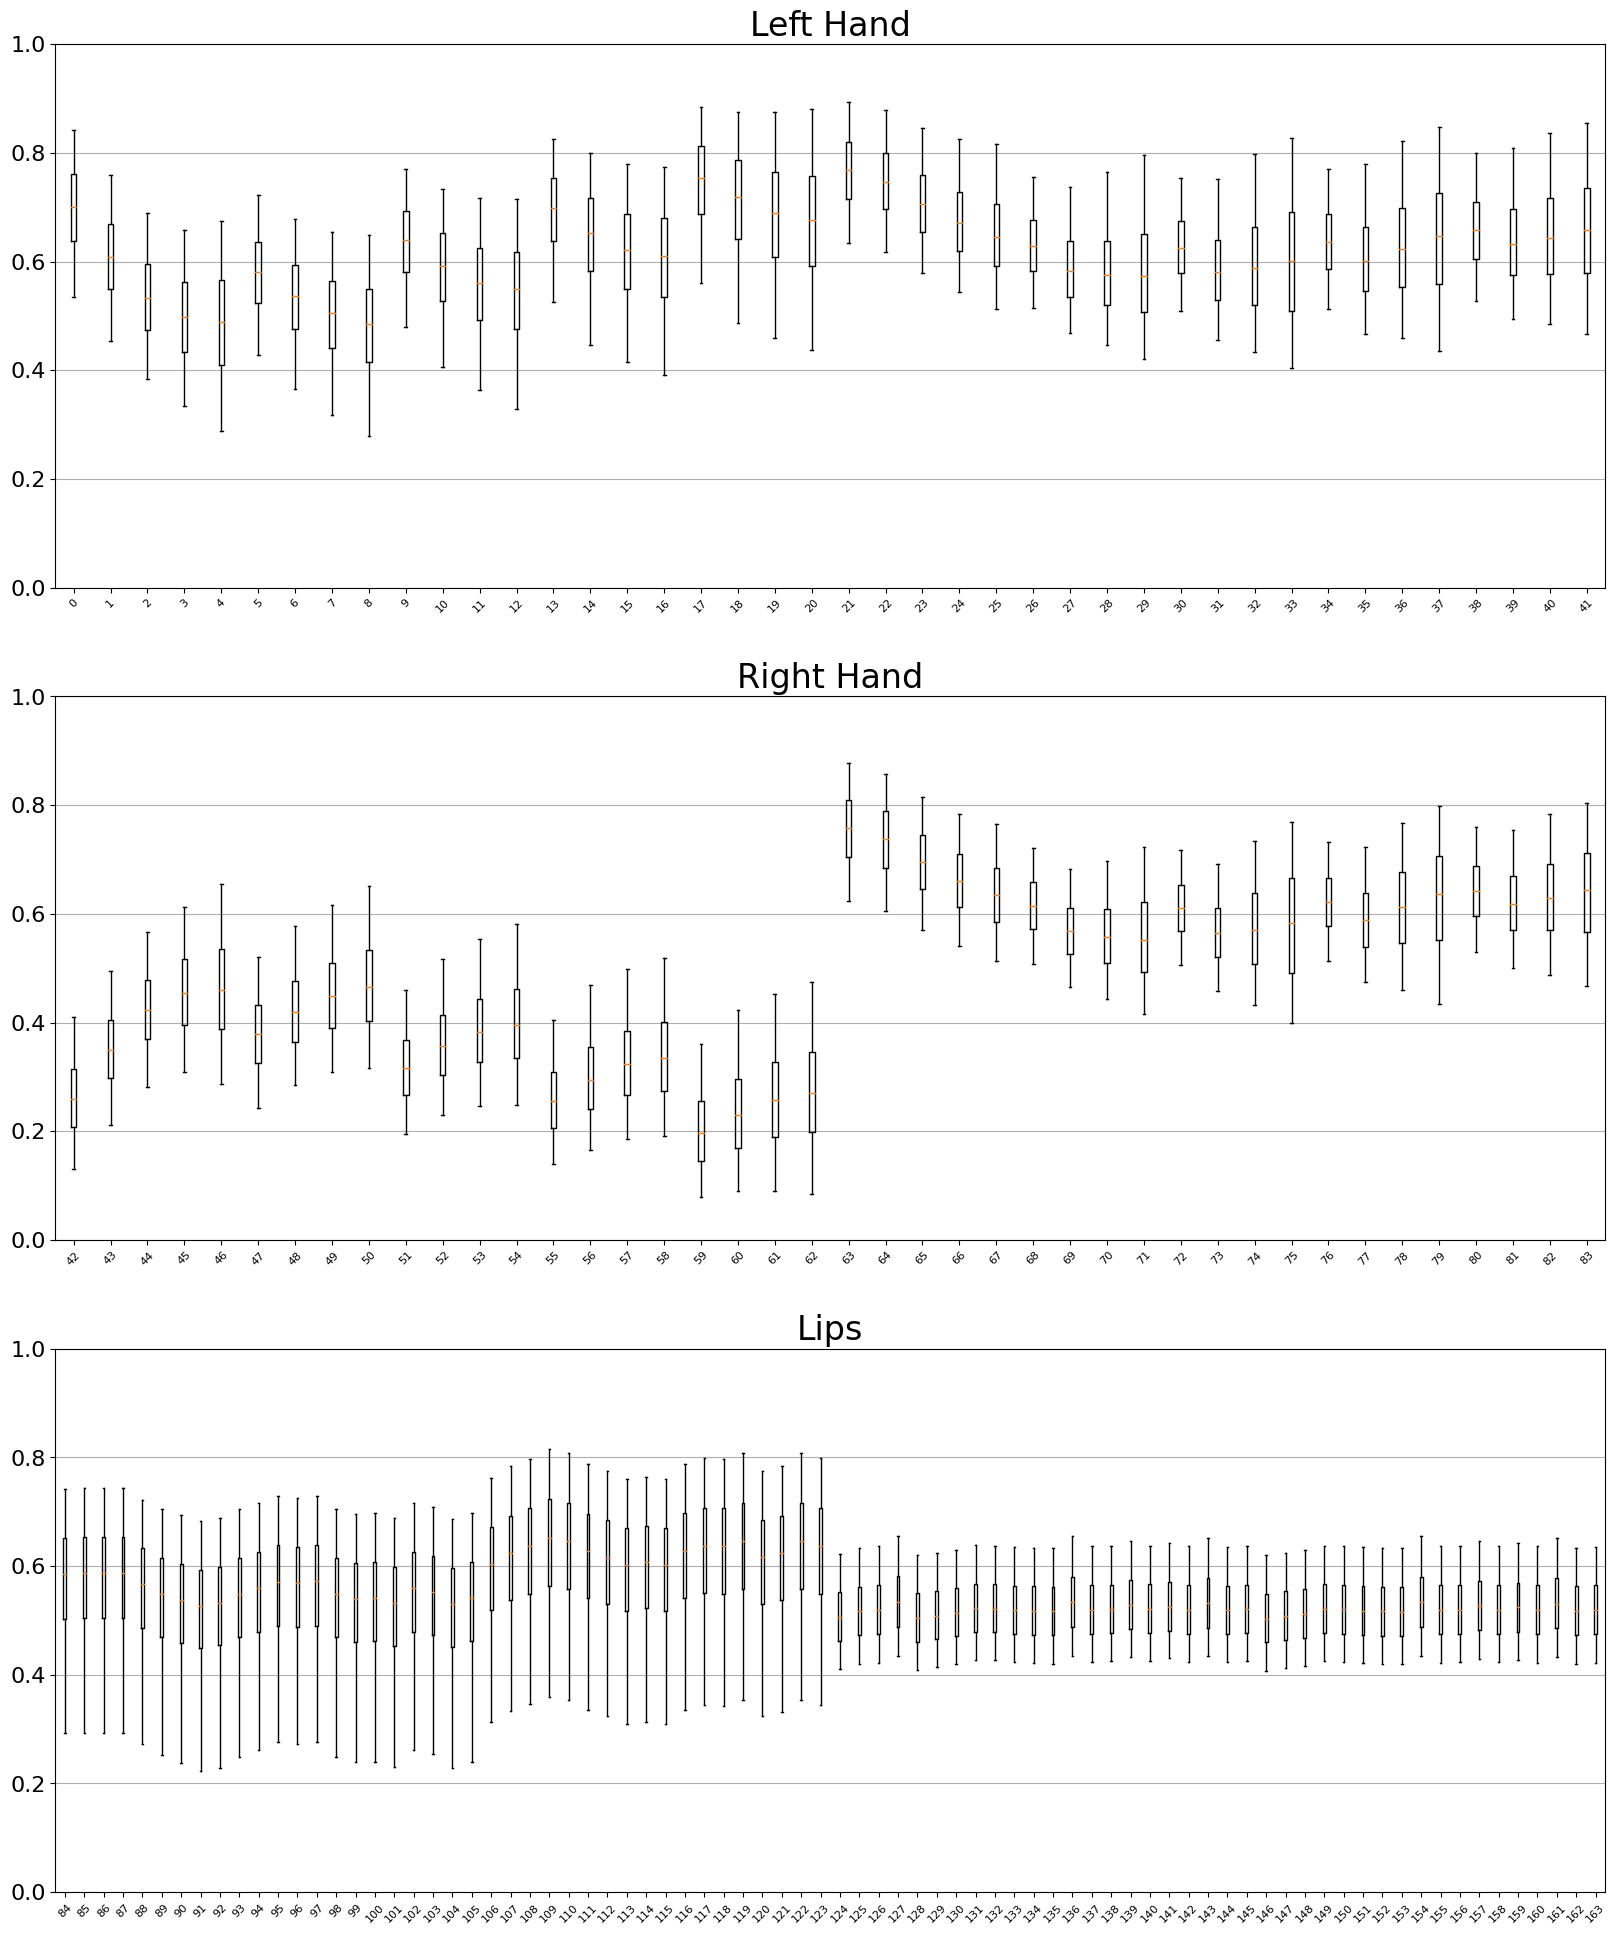

In [ ]:
def get_left_right_hand_mean_std():
    # Initializing arrays to hold mean and standard deviation values for each column
    MEANS = np.zeros([N_COLS], dtype=np.float32)
    STDS = np.zeros([N_COLS], dtype=np.float32)

    # Creating a figure and axes for plotting
    fig, axes = plt.subplots(3, figsize=(20, 3*8))

    # Iterating over all landmarks
    for col, v in enumerate(tqdm(X.reshape([-1, N_COLS]).T)):
        # Removing zero values as they represent NaN values
        v = v[np.nonzero(v)]
        # Calculating mean and standard deviation for each column
        MEANS[col] = v.astype(np.float32).mean()
        STDS[col] = v.astype(np.float32).std()
        # Plotting boxplots based on left/right hand indices or for other landmarks
        if col in LEFT_HAND_IDXS:
            axes[0].boxplot(v, notch=False, showfliers=False, positions=[col], whis=[5,95])
        elif col in RIGHT_HAND_IDXS:
            axes[1].boxplot(v, notch=False, showfliers=False, positions=[col], whis=[5,95])
        else:
            axes[2].boxplot(v, notch=False, showfliers=False, positions=[col], whis=[5,95])

    # Setting titles, axes parameters, and grid for each subplot
    for ax, name in zip(axes, ['Left Hand', 'Right Hand', 'Lips']):
        ax.set_title(f'{name}', size=24)
        ax.tick_params(axis='x', labelsize=8, rotation=45)
        ax.set_ylim(0.0, 1.0)
        ax.grid(axis='y')

    # Displaying the plots
    plt.show()

    # Returning calculated means and standard deviations for each column
    return MEANS, STDS

# Obtaining mean and standard deviation values for dominant hand
MEANS, STDS = get_left_right_hand_mean_std()

# Saving Mean and Standard Deviation values for further use in a neural network model
np.save('MEANS.npy', MEANS)
np.save('STDS.npy', STDS)

# Training the Transformer

The model comprises a transformer embedding, encoder, and decoder. During inference, the process starts with an SOS (Start of Sentence) token and predicts one character at a time based on the previous prediction.

Inspiration is drawn from the [1st place solution - training](https://www.kaggle.com/code/hoyso48/1st-place-solution-training) in the previous [Google - Isolated Sign Language Recognition](https://www.kaggle.com/competitions/asl-signs) competition.

**Current Configuration:**

* Training epochs: 100
* Training using all available data without a separate validation set
* Number of decoder blocks: 3
* Encoder dimensions: 384
* Halved attention dimension for reduced Multi-Head Attention computational intensity
* Added 20% dropout to Multi-Head Attention output
* Batch size: 64
* Employed linear activation for logits in the loss function's classification layer

Extra Modifications:

* Enhanced transformer architecture efficiency based on [1st place solution - training](https://www.kaggle.com/code/hoyso48/1st-place-solution-training) by [HOYSO48](https://www.kaggle.com/hoyso48).
* Increased NUM_BLOCKS_ENCODER from 3 to 4.
* Corrected attention mask in decoder: changed from causal to non-empty frames.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn
import tensorflow as tf
import tensorflow_addons as tfa

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from leven import levenshtein

import glob
import sys
import os
import math
import gc
import sys
import sklearn
import time
import json

# TQDM Progress Bar With Pandas Apply Function
tqdm.pandas()

print(f'Tensorflow Version {tf.__version__}')
print(f'Python Version: {sys.version}')

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Tensorflow Version 2.13.0
Python Version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]


# Character 2 Ordinal Encoding
Reading a JSON file that holds mappings between characters and their ordinal encodings. Creating dictionaries to convert characters to ordinals and vice versa. Finally, displaying the ordinal encoding for each character in a Pandas DataFrame.

In [ ]:
# Read Character to Ordinal Encoding Mapping

# Open the JSON file containing character to ordinal encoding mapping
with open('/kaggle/input/asl-fingerspelling/character_to_prediction_index.json') as json_file:
    CHAR2ORD = json.load(json_file)  # Load the mapping into the CHAR2ORD dictionary

# Create a dictionary mapping ordinal values to characters
ORD2CHAR = {j: i for i, j in CHAR2ORD.items()}

# Display the mapping of characters to their ordinal encodings in a Pandas DataFrame
display(pd.Series(CHAR2ORD).to_frame('Ordinal Encoding'))

,Ordinal Encoding
,0
!,1
#,2
$,3
%,4
&,5
',6
(,7
),8
*,9


# Global Config

Initializing various global configurations and settings crucial for training a model for a language prediction task. Determining parameters such as data allocation, batch size, number of epochs, learning rate, and tokens used for text prediction while allowing for flexibility in interactive and committed notebook execution modes.

In [ ]:
# Checking if the notebook is running in interactive mode or by committing
IS_INTERACTIVE = os.environ['KAGGLE_KERNEL_RUN_TYPE'] == 'Interactive'

# Setting verbosity level based on the mode of execution
VERBOSE = 1 if IS_INTERACTIVE else 2

# Setting a global random seed for reproducibility
SEED = 42

# Resizing the recording frames to a specific target number
N_TARGET_FRAMES = 128

# Flag to toggle debugging mode, potentially using a subset of training data
DEBUG = False

# Calculating the number of unique characters to predict (including special tokens)
N_UNIQUE_CHARACTERS0 = len(CHAR2ORD)
N_UNIQUE_CHARACTERS = len(CHAR2ORD) + 1 + 1 + 1
PAD_TOKEN = len(CHAR2ORD)  # Padding
SOS_TOKEN = len(CHAR2ORD) + 1  # Start Of Sentence
EOS_TOKEN = len(CHAR2ORD) + 2  # End Of Sentence

# Determining whether to allocate 10% of the data for validation
USE_VAL = False

# Setting the batch size for training
BATCH_SIZE = 64

# Defining the number of epochs for training based on the execution mode
N_EPOCHS = 2 if IS_INTERACTIVE else 100

# Number of warm-up epochs in the learning rate scheduler
N_WARMUP_EPOCHS = 10

# Specifying the maximum learning rate
LR_MAX = 1e-3

# Weight decay ratio as a proportion of the learning rate
WD_RATIO = 0.05

# Maximum length of the phrase along with the End Of Sentence token
MAX_PHRASE_LENGTH = 31 + 1

# Flag to indicate whether to train the model
TRAIN_MODEL = True

# Flag to determine whether to load pretrained weights
LOAD_WEIGHTS = False

# Learning rate warm-up method, either 'log' or 'exp'
WARMUP_METHOD = 'exp'

# Plot Config

In [ ]:
# MatplotLib Global Settings
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 24

# Train

In [ ]:
# Read Train DataFrame
if DEBUG:
    train = pd.read_csv('/kaggle/input/asl-fingerspelling/train.csv').head(5000)
else:
    train = pd.read_csv('/kaggle/input/asl-fingerspelling/train.csv')

# Set Train Indexed By sqeuence_id
train_sequence_id = train.set_index('sequence_id')

# Number Of Train Samples
N_SAMPLES = len(train)
print(f'N_SAMPLES: {N_SAMPLES}')

display(train.info())
display(train.head())

N_SAMPLES: 67208
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67208 entries, 0 to 67207
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            67208 non-null  object
 1   file_id         67208 non-null  int64 
 2   sequence_id     67208 non-null  int64 
 3   participant_id  67208 non-null  int64 
 4   phrase          67208 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


None

,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
3,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane
4,train_landmarks/5414471.parquet,5414471,1817123330,89,6920 northeast 661st road


# File Path

In [ ]:
# Get complete file path to file
def get_file_path(path):
    return f'/kaggle/input/asl-fingerspelling/{path}'

train['file_path'] = train['path'].apply(get_file_path)

# Example File Paths

In [ ]:
# Unique Parquet Files
INFERENCE_FILE_PATHS = pd.Series(
        glob.glob('/kaggle/working/train_landmark_subsets/*')
    )

print(f'Found {len(INFERENCE_FILE_PATHS)} Inference Pickle Files')

Found 10 Inference Pickle Files


# Load X/y
Loading input and target data for training and validation or all training data based on a condition. Extracting subsets of the target data based on the maximum phrase length, counts the samples, and displaying the shapes of the data loaded for training and validation (if applicable).

In [ ]:
# Load X/y - Loading data for training and validation

# TRAIN
if USE_VAL:
    # TRAIN
    X_train = np.load('/kaggle/working/X_train.npy')  # Loading training input data
    y_train = np.load('/kaggle/working/y_train.npy')[:, :MAX_PHRASE_LENGTH]  # Loading training target data, limiting to max phrase length
    N_TRAIN_SAMPLES = len(X_train)  # Counting the number of training samples
    # VAL
    X_val = np.load('/kaggle/working/X_val.npy')  # Loading validation input data
    y_val = np.load('/kaggle/working/y_val.npy')[:, :MAX_PHRASE_LENGTH]  # Loading validation target data, limiting to max phrase length
    N_VAL_SAMPLES = len(X_val)  # Counting the number of validation samples
    # Shapes - Displaying shapes of training and validation data
    print(f'X_train shape: {X_train.shape}, X_val shape: {X_val.shape}')

# Train On All Data
else:
    # TRAIN
    X_train = np.load('/kaggle/working/X.npy')  # Loading all data for training input
    y_train = np.load('/kaggle/working/y.npy')[:, :MAX_PHRASE_LENGTH]  # Loading all data for training target, limited to max phrase length
    N_TRAIN_SAMPLES = len(X_train)  # Counting the number of training samples
    # Displaying the shape of the training data
    print(f'X_train shape: {X_train.shape}')

X_train shape: (61955, 128, 164)


# Example Batch
Defining two batches, one with a larger subset of training data for debugging purposes and another smaller subset, containing frames and phrases used for testing the model functionalities and debugging processes.

In [ ]:
# Setting the number of examples in the batch for debugging purposes
N_EXAMPLE_BATCH_SAMPLES = 1024
N_EXAMPLE_BATCH_SAMPLES_SMALL = 32

# Creating an example batch containing a subset of training data for frames and phrases
X_batch = {
    'frames': np.copy(X_train[:N_EXAMPLE_BATCH_SAMPLES]),
    'phrase': np.copy(y_train[:N_EXAMPLE_BATCH_SAMPLES]),
#     'phrase_type': np.copy(y_phrase_type_train[:N_EXAMPLE_BATCH_SAMPLES]),
}
y_batch = np.copy(y_train[:N_EXAMPLE_BATCH_SAMPLES])

# Creating a smaller example batch for debugging with a smaller subset of data
X_batch_small = {
    'frames': np.copy(X_train[:N_EXAMPLE_BATCH_SAMPLES_SMALL]),
    'phrase': np.copy(y_train[:N_EXAMPLE_BATCH_SAMPLES_SMALL]),
#     'phrase_type': np.copy(y_phrase_type_train[:N_EXAMPLE_BATCH_SAMPLES_SMALL]),
}
y_batch_small = np.copy(y_train[:N_EXAMPLE_BATCH_SAMPLES_SMALL])

# Example Parquet

In [ ]:
# Read First Parquet File
# example_parquet_df = pd.read_parquet(train['file_path'][0])
example_parquet_df = pd.read_parquet(INFERENCE_FILE_PATHS[0])

# Each parquet file contains 1000 recordings
print(f'# Unique Recording: {example_parquet_df.index.nunique()}')
# Display DataFrame layout
display(example_parquet_df.head())

# Unique Recording: 1000


,x_left_hand_0,x_left_hand_1,x_left_hand_2,x_left_hand_3,x_left_hand_4,x_left_hand_5,x_left_hand_6,x_left_hand_7,x_left_hand_8,x_left_hand_9,...,y_face_314,y_face_317,y_face_318,y_face_321,y_face_324,y_face_375,y_face_402,y_face_405,y_face_409,y_face_415
sequence_id,,,,,,,,,,,,,,,,,,,,,
2041982615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.614763,0.593542,0.597209,0.609568,0.600008,0.606648,0.594670,0.613004,0.599420,0.600299
2041982615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.614727,0.592516,0.596296,0.609051,0.599060,0.605846,0.593726,0.612806,0.598341,0.599318
2041982615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.613517,0.592487,0.596362,0.608636,0.599097,0.605748,0.593769,0.611941,0.598363,0.599226
2041982615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.613401,0.592058,0.595865,0.608411,0.598620,0.605392,0.593285,0.611825,0.597920,0.598768
2041982615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.612562,0.592142,0.596208,0.607989,0.598963,0.605335,0.593545,0.611077,0.598323,0.599177


# Landmark Indices
The function get_idxs extracts indices and column names from a DataFrame based on specified positive and negative words, fulfilling certain conditions. It iterates through columns, excludes 'frame', filters columns containing specific words, and returns either indices with names or just indices based on the condition.

In [ ]:
# Function to get indices in the original dataframe based on specified words and positive/negative conditions
def get_idxs(df, words_pos, words_neg=[], ret_names=True, idxs_pos=None):
    idxs = []  # Initializing empty list for indices
    names = []  # Initializing empty list for column names
    for w in words_pos:  # Iterate over positive words
        for col_idx, col in enumerate(example_parquet_df.columns):  # Loop through dataframe columns
            # Exclude Non Landmark Columns
            if col in ['frame']:  # Skip 'frame' column
                continue

            col_idx = int(col.split('_')[-1])  # Extract index from column name
            # Check if column name contains all words and meets conditions
            if (w in col) and (idxs_pos is None or col_idx in idxs_pos) and all([w not in col for w in words_neg]):
                idxs.append(col_idx)  # Append index to list
                names.append(col)  # Append column name to list
    # Convert lists to numpy arrays
    idxs = np.array(idxs)
    names = np.array(names)
    # Returns either both column indices and names if ret_names is True, otherwise only column indices
    if ret_names:
        return idxs, names
    else:
        return idxs

Defining and retrieving specific landmark indices for lips and hands from raw data, concatenates their names, counts the total columns used (ignoring Z axis), and specifies the dimensions to be analyzed (X and Y axes). Dsiplaying the number of columns utilized for the analysis.

In [ ]:
# Define landmark indices for lips on a face
LIPS_LANDMARK_IDXS = np.array([
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 146, 91, 181, 84, 17, 314, 405, 321, 375,
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    95, 88, 178, 87, 14, 317, 402, 318, 324, 308,
])

# Obtain specific landmark indices for hands and lips without the Z axis in raw data
LEFT_HAND_IDXS0, LEFT_HAND_NAMES0 = get_idxs(example_parquet_df, ['left_hand'], ['z'])
RIGHT_HAND_IDXS0, RIGHT_HAND_NAMES0 = get_idxs(example_parquet_df, ['right_hand'], ['z'])
LIPS_IDXS0, LIPS_NAMES0 = get_idxs(example_parquet_df, ['face'], ['z'], idxs_pos=LIPS_LANDMARK_IDXS)

# Create a concatenated array of all relevant landmark names for hands and lips
COLUMNS0 = np.concatenate((LEFT_HAND_NAMES0, RIGHT_HAND_NAMES0, LIPS_NAMES0))
N_COLS0 = len(COLUMNS0)  # Calculate the total number of columns

N_DIMS0 = 2  # Specify that only X and Y axes are used for analysis

print(f'N_COLS0: {N_COLS0}')  # Output the number of columns for analysis

N_COLS0: 164


Indices for columns related to the left and right hand, along with lips, are extracted from a subset of a dataframe. These columns are then organized into hand indices. The code defines the number of columns and sets the number of dimensions to 2, focusing only on X/Y axes for analysis. Finally, it prints the number of columns as a reference.

In [ ]:
# Obtaining indices of columns related to the left hand in the subset dataframe
LEFT_HAND_IDXS = np.argwhere(np.isin(COLUMNS0, LEFT_HAND_NAMES0)).squeeze()

# Obtaining indices of columns related to the right hand in the subset dataframe
RIGHT_HAND_IDXS = np.argwhere(np.isin(COLUMNS0, RIGHT_HAND_NAMES0)).squeeze()

# Obtaining indices of columns related to the lips in the subset dataframe
LIPS_IDXS = np.argwhere(np.isin(COLUMNS0, LIPS_NAMES0)).squeeze()

# Concatenating the left and right hand indices to form the hand indices
HAND_IDXS = np.concatenate((LEFT_HAND_IDXS, RIGHT_HAND_IDXS), axis=0)

# Storing the number of columns from the original dataframe
N_COLS = N_COLS0

# Defining the number of dimensions (in this case, only X/Y axes are used)
N_DIMS = 2

# Printing the number of columns for reference
print(f'N_COLS: {N_COLS}')

N_COLS: 164


The code extracts indices of 'x' and 'y' axes data for the dominant hand from a processed dataset and then retrieves their corresponding names, organizing them separately for further analysis or processing.

In [ ]:
# Indices in processed data by axes with only dominant hand
HAND_X_IDXS = np.array(
    [idx for idx, name in enumerate(LEFT_HAND_NAMES0) if 'x' in name]
).squeeze()  # Extracts indices of 'x' axes in processed data for the dominant hand

HAND_Y_IDXS = np.array(
    [idx for idx, name in enumerate(LEFT_HAND_NAMES0) if 'y' in name]
).squeeze()  # Extracts indices of 'y' axes in processed data for the dominant hand

# Names in processed data by axes
HAND_X_NAMES = LEFT_HAND_NAMES0[HAND_X_IDXS]  # Retrieves 'x' axis names for the dominant hand
HAND_Y_NAMES = LEFT_HAND_NAMES0[HAND_Y_IDXS]  # Retrieves 'y' axis names for the dominant hand

# Mean/STD Loading

In [ ]:
# Load mean values of the data used for normalization
MEANS = np.load('/kaggle/working/MEANS.npy').reshape(-1)

# Load standard deviation values of the data used for normalization
STDS = np.load('/kaggle/working/STDS.npy').reshape(-1)

# Tensorflow Preprocessing Layer
Defining a TensorFlow layer (PreprocessLayer) responsible for data preprocessing to be used within a TFLite model. It involves handling NaN values, filtering frames without hand data, padding frames, downsampling, and ultimately preparing the data for model input, ensuring it adheres to certain shape and normalization requirements.

In [ ]:
# Tensorflow layer to preprocess data for TFLite
# Data processing integrated within the model due to Python unavailability

class PreprocessLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PreprocessLayer, self).__init__()
        # Normalization correction for hand coordinates
        self.normalisation_correction = tf.constant(
            [0.50 if 'x' in name else 0.00 for name in LEFT_HAND_NAMES0],
            dtype=tf.float32,
        )

    @tf.function(
        input_signature=(tf.TensorSpec(shape=[None,N_COLS0], dtype=tf.float32),),
    )
    def call(self, data0, resize=True):
        # Handling NaN values by replacing with 0
        data = tf.where(tf.math.is_nan(data0), 0.0, data0)

        # Reshaping the data
        data = data[None]

        # Filtering frames without hand data
        hands = tf.slice(data, [0,0,0], [-1, -1, 84])
        hands = tf.abs(hands)
        mask = tf.reduce_sum(hands, axis=2)
        mask = tf.not_equal(mask, 0)
        data = data[mask][None]

        # Zero padding to match target frame count
        N_FRAMES = len(data[0])
        if N_FRAMES < N_TARGET_FRAMES:
            data = tf.concat((
                data,
                tf.zeros([1,N_TARGET_FRAMES-N_FRAMES,N_COLS], dtype=tf.float32)
            ), axis=1)

        # Downsample the data
        data = tf.image.resize(
            data,
            [1, N_TARGET_FRAMES],
            method=tf.image.ResizeMethod.BILINEAR,
        )

        # Remove batch dimension
        data = tf.squeeze(data, axis=[0])

        return data

# Creating an instance of the PreprocessLayer
preprocess_layer = PreprocessLayer()

In [ ]:
# Function to test the preprocessing layer
def test_preprocess_layer():
    # Get a unique sequence ID from the example Parquet DataFrame
    demo_sequence_id = example_parquet_df.index.unique()[15]
    # Extract raw data for the demo sequence using specific columns
    demo_raw_data = example_parquet_df.loc[demo_sequence_id, COLUMNS0]
    # Apply preprocessing layer to the raw data
    data = preprocess_layer(demo_raw_data)

    # Display shapes of the raw data and processed data
    print(f'demo_raw_data shape: {demo_raw_data.shape}')
    print(f'data shape: {data.shape}')

    return data  # Return the processed data

# If in interactive mode, test the preprocess layer function
if IS_INTERACTIVE:
    data = test_preprocess_layer()

demo_raw_data shape: (127, 164)
data shape: (128, 164)


# Train Dataset
This function get_train_dataset generates a training dataset iterator. It selects random samples of frames and corresponding phrases from the input dataset X and y with a specified batch size, preparing inputs and outputs for the model training in batches. The function continuously yields batches of inputs and outputs for training.

In [ ]:
# Train Dataset Iterator
# Function to generate a training dataset iterator
def get_train_dataset(X, y, batch_size=BATCH_SIZE):
    # Create an array of indices based on the length of input X
    sample_idxs = np.arange(len(X))
    while True:
        # Generate random indices from sample_idxs with a specified batch size
        random_sample_idxs = np.random.choice(sample_idxs, batch_size)

        # Prepare inputs for the model: frames from X and corresponding phrases from y
        inputs = {
            'frames': X[random_sample_idxs],
            'phrase': y[random_sample_idxs],
        }

        # Prepare outputs, same as phrases from y
        outputs = y[random_sample_idxs]

        # Yield the batch of inputs and outputs
        yield inputs, outputs

In [ ]:
# Train Dataset
train_dataset = get_train_dataset(X_train, y_train)

In [ ]:
# Training Steps Per Epoch
TRAIN_STEPS_PER_EPOCH = math.ceil(N_TRAIN_SAMPLES / BATCH_SIZE)
print(f'TRAIN_STEPS_PER_EPOCH: {TRAIN_STEPS_PER_EPOCH}')

TRAIN_STEPS_PER_EPOCH: 969


# Validation Dataset
This function get_val_dataset generates batches for the validation set by iterating through the provided data in batches of a specified size. It creates offsets to manage the iteration process and yields batches of inputs and outputs necessary for validation during model training or evaluation.

In [ ]:
# Validation Set
# Function to generate batches for validation set
def get_val_dataset(X, y, batch_size=BATCH_SIZE):
    # Create offsets for batch iteration
    offsets = np.arange(0, len(X), batch_size)
    while True:
        # Iterate through the validation set in batches
        for offset in offsets:
            # Prepare inputs and outputs for the current batch
            inputs = {
                'frames': X[offset:offset+batch_size],
                'phrase': y[offset:offset+batch_size],
            }
            outputs = y[offset:offset+batch_size]

            # Yield the batch inputs and outputs
            yield inputs, outputs

In [ ]:
# Validation Dataset
if USE_VAL:
    val_dataset = get_val_dataset(X_val, y_val)

In [ ]:
if USE_VAL:
    N_VAL_STEPS_PER_EPOCH = math.ceil(N_VAL_SAMPLES / BATCH_SIZE)
    print(f'N_VAL_STEPS_PER_EPOCH: {N_VAL_STEPS_PER_EPOCH}')

# Model Config
This script defines key parameters for a Transformer model, specifying values for layer normalization, embedding sizes, transformer blocks, dropout rates, initializers, and activation functions, essential for building the Transformer architecture in a machine learning framework.

In [ ]:
# Epsilon value for layer normalisation
LAYER_NORM_EPS = 1e-6

# final embedding and transformer embedding size
UNITS_ENCODER = 384
UNITS_DECODER = 256

# Transformer parameters
NUM_BLOCKS_ENCODER = 4
NUM_BLOCKS_DECODER = 2
NUM_HEADS = 4
MLP_RATIO = 2

# Dropout rates
EMBEDDING_DROPOUT = 0.00
MLP_DROPOUT_RATIO = 0.30
MHA_DROPOUT_RATIO = 0.20
CLASSIFIER_DROPOUT_RATIO = 0.10

# Initializers
INIT_HE_UNIFORM = tf.keras.initializers.he_uniform
INIT_GLOROT_UNIFORM = tf.keras.initializers.glorot_uniform
INIT_ZEROS = tf.keras.initializers.constant(0.0)

# Activations
GELU = tf.keras.activations.gelu

# Landmark Embedding
This code defines a TensorFlow model, LandmarkEmbedding, that creates an embedding for landmarks using fully connected layers. It initializes an empty embedding for missing landmarks and applies dense layers to embed the landmark data, handling cases where landmarks are present or missing in frames.

In [ ]:
# Embeds a landmark using fully connected layers
class LandmarkEmbedding(tf.keras.Model):
    def __init__(self, units, name):
        super(LandmarkEmbedding, self).__init__(name=f'{name}_embedding')
        self.units = units
        self.supports_masking = True

    def build(self, input_shape):
        # Embedding for missing landmark in frame, initialized with zeros
        self.empty_embedding = self.add_weight(
            name=f'{self.name}_empty_embedding',
            shape=[self.units],
            initializer=INIT_ZEROS,
        )
        # Embedding layers
        self.dense = tf.keras.Sequential([
            tf.keras.layers.Dense(self.units, name=f'{self.name}_dense_1', use_bias=False, kernel_initializer=INIT_GLOROT_UNIFORM, activation=GELU),
            tf.keras.layers.Dense(self.units, name=f'{self.name}_dense_2', use_bias=False, kernel_initializer=INIT_HE_UNIFORM),
        ], name=f'{self.name}_dense')

    def call(self, x):
        return tf.where(
                # Checks whether landmark is missing in frame
                tf.reduce_sum(x, axis=2, keepdims=True) == 0,
                # If so, the empty embedding is used
                self.empty_embedding,
                # Otherwise, the landmark data is embedded
                self.dense(x),
            )

# Embedding
The code defines an Embedding class responsible for creating embeddings for each frame of data, implementing positional embedding and a dominant hand embedding layer. The call method normalizes the input, embeds the dominant hand, and adds positional encoding to the input frames.

In [ ]:
# Creates embedding for each frame

class Embedding(tf.keras.Model):
    def __init__(self):
        super(Embedding, self).__init__()
        self.supports_masking = True  # Indicates support for masking within the model

    def build(self, input_shape):
        # Positional embedding for each frame index
        self.positional_embedding = tf.Variable(
            initial_value=tf.zeros([N_TARGET_FRAMES, UNITS_ENCODER], dtype=tf.float32),
            trainable=True,
            name='embedding_positional_encoder',
        )
        # Embedding layer for Landmarks
        self.dominant_hand_embedding = LandmarkEmbedding(UNITS_ENCODER, 'dominant_hand')  # Initiates a LandmarkEmbedding instance

    def call(self, x, training=False):
        # Normalize the input data
        x = tf.where(
                tf.math.equal(x, 0.0),
                0.0,
                (x - MEANS) / STDS,
            )
        # Apply Dominant Hand embedding
        x = self.dominant_hand_embedding(x)
        # Add Positional Encoding
        x = x + self.positional_embedding

        return x

# Transformer
The code defines a MultiHeadAttention layer in TensorFlow based on a specific source. It implements a multi-head attention mechanism with query, key, and value projections, incorporating masking using a softmax activation layer and reshaping operations for attention heads. The call method applies the attention mechanism, reshapes, projects the output, and applies dropout before returning the final result.

In [ ]:
# Comments explaining the purpose of the code and source reference
# Definition of MultiHeadAttention as a layer in TensorFlow
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, dropout, d_out=None):
        super(MultiHeadAttention, self).__init__()
        # Number of Units in Model
        self.d_model = d_model
        # Number of Attention Heads
        self.n_heads = n_heads
        # Number of Units in Intermediate Layers
        self.depth = d_model // 2
        # Scaling Factor Of Values
        self.scale = 1.0 / tf.math.sqrt(tf.cast(self.depth, tf.float32))
        # Learnable Projections to Depth for Query, Key, and Value
        self.wq = self.fused_mha(self.depth)
        self.wk = self.fused_mha(self.depth)
        self.wv = self.fused_mha(self.depth)
        # Output Projection
        self.wo = tf.keras.layers.Dense(d_model if d_out is None else d_out, use_bias=False)
        # Softmax Activation Layer That Supports Masking
        self.softmax = tf.keras.layers.Softmax()
        # Reshaping of Multiple Attention Heads to a Single Value
        self.reshape = tf.keras.Sequential([
            # [attention heads, number of frames, d_model] → [number of frames, n_heads, d_model // n_heads]
            tf.keras.layers.Permute([2, 1, 3]),
            # [number of frames, attention heads, d_model] → [number of frames, d_model]
            tf.keras.layers.Reshape([N_TARGET_FRAMES, self.depth]),
        ])
        # Output Dropout Layer
        self.do = tf.keras.layers.Dropout(dropout)
        self.supports_masking = True

    # Single dense layer for all attention heads
    def fused_mha(self, dim):
        return tf.keras.Sequential([
            # Single dense layer
            tf.keras.layers.Dense(dim, use_bias=False),
            # Reshape to [number of frames, number of attention head, depth]
            tf.keras.layers.Reshape([N_TARGET_FRAMES, self.n_heads, dim // self.n_heads]),
            # Permutate to [number of attention heads, number of frames, depth]
            tf.keras.layers.Permute([2, 1, 3]),
        ])

    def call(self, q, k, v, attention_mask=None, training=False):
        # Projections to attention heads
        Q = self.wq(q)
        K = self.wk(k)
        V = self.wv(v)
        # Matrix multiply QxK to acquire attention scores
        x = tf.matmul(Q, K, transpose_b=True) * self.scale
        # Softmax attention scores and Multiply with Values
        x = self.softmax(x, mask=attention_mask) @ V
        # Reshape to flatten attention heads
        x = self.reshape(x)
        # Output projection
        x = self.wo(x)
        # Dropout
        x = self.do(x, training=training)
        return x

# Encoder
The code defines an Encoder class that utilizes multiple Transformer blocks. Each block includes layers for normalization, multi-head attention, multi-layer perceptron, and an optional projection to a Decoder dimension. The call method iterates over these blocks, applying attention masks and transforming the input accordingly, and the output is optionally projected to the Decoder dimension.

[source](https://keras.io/examples/nlp/neural_machine_translation_with_transformer/)

In [ ]:
# Encoder based on multiple transformer blocks
# Class definition for the Encoder model
class Encoder(tf.keras.Model):
    # Initialization method defining the Encoder
    def __init__(self, num_blocks):
        super(Encoder, self).__init__(name='encoder')
        self.num_blocks = num_blocks
        self.supports_masking = True

    # Build method to create Transformer blocks
    def build(self, input_shape):
        self.ln_1s = []
        self.mhas = []
        self.ln_2s = []
        self.mlps = []
        # Loop to create multiple Transformer blocks
        for i in range(self.num_blocks):
            # Initializing Layer Normalization for the first layer
            self.ln_1s.append(tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS))
            # Initializing Multi Head Attention
            self.mhas.append(MultiHeadAttention(UNITS_ENCODER, NUM_HEADS, MHA_DROPOUT_RATIO))
            # Initializing Layer Normalization for the second layer
            self.ln_2s.append(tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS))
            # Initializing Multi Layer Perceptron
            self.mlps.append(tf.keras.Sequential([
                tf.keras.layers.Dense(UNITS_ENCODER * MLP_RATIO, activation=GELU, kernel_initializer=INIT_GLOROT_UNIFORM, use_bias=False),
                tf.keras.layers.Dropout(MLP_DROPOUT_RATIO),
                tf.keras.layers.Dense(UNITS_ENCODER, kernel_initializer=INIT_HE_UNIFORM, use_bias=False),
            ]))
            # Optional projection to Decoder dimension
            if UNITS_ENCODER != UNITS_DECODER:
                self.dense_out = tf.keras.layers.Dense(UNITS_DECODER, kernel_initializer=INIT_GLOROT_UNIFORM, use_bias=False)
                self.apply_dense_out = True
            else:
                self.apply_dense_out = False

    # Method to get attention mask to ignore missing frames
    def get_attention_mask(self, x_inp):
        attention_mask = tf.math.count_nonzero(x_inp, axis=[2], keepdims=True, dtype=tf.int32)
        attention_mask = tf.math.count_nonzero(attention_mask, axis=[2], keepdims=False)
        attention_mask = tf.expand_dims(attention_mask, axis=1)
        attention_mask = tf.expand_dims(attention_mask, axis=1)
        return attention_mask

    # Method defining the call function for the Encoder
    def call(self, x, x_inp, training=False):
        attention_mask = self.get_attention_mask(x_inp)
        # Loop to iterate over Transformer blocks
        for ln_1, mha, ln_2, mlp in zip(self.ln_1s, self.mhas, self.ln_2s, self.mlps):
            x = ln_1(x + mha(x, x, x, attention_mask=attention_mask))
            x = ln_2(x + mlp(x))

        if self.apply_dense_out:
            x = self.dense_out(x)

        return x

# Decoder
The Decoder class implements multiple transformer blocks for decoding. It constructs the decoder with attention mechanisms, embeddings, and normalization layers. The call function processes the input through the defined transformer blocks, applying attention masks and positional embeddings to generate the output sequences.

In [ ]:
# Decoder based on multiple transformer blocks
class Decoder(tf.keras.Model):
    def __init__(self, num_blocks):
        super(Decoder, self).__init__(name='decoder')
        self.num_blocks = num_blocks
        self.supports_masking = True

    def build(self, input_shape):
        # Causal Mask Batch Size 1
        self.causal_mask = self.get_causal_attention_mask()
        # Positional Embedding, initialized with zeros
        self.positional_embedding = tf.Variable(
            initial_value=tf.zeros([N_TARGET_FRAMES, UNITS_DECODER], dtype=tf.float32),
            trainable=True,
            name='embedding_positional_encoder',
        )
        # Character Embedding
        self.char_emb = tf.keras.layers.Embedding(N_UNIQUE_CHARACTERS, UNITS_DECODER, embeddings_initializer=INIT_ZEROS)
        # Positional Encoder MHA
        self.pos_emb_mha = MultiHeadAttention(UNITS_DECODER, NUM_HEADS, MHA_DROPOUT_RATIO)
        self.pos_emb_ln = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS)
        # First Layer Normalisation
        self.ln_1s = []
        self.mhas = []
        self.ln_2s = []
        self.mlps = []
        # Make Transformer Blocks
        for i in range(self.num_blocks):
            # First Layer Normalisation
            self.ln_1s.append(tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS))
            # Multi Head Attention
            self.mhas.append(MultiHeadAttention(UNITS_DECODER, NUM_HEADS, MHA_DROPOUT_RATIO))
            # Second Layer Normalisation
            self.ln_2s.append(tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS))
            # Multi Layer Perception
            self.mlps.append(tf.keras.Sequential([
                tf.keras.layers.Dense(UNITS_DECODER * MLP_RATIO, activation=GELU, kernel_initializer=INIT_GLOROT_UNIFORM, use_bias=False),
                tf.keras.layers.Dropout(MLP_DROPOUT_RATIO),
                tf.keras.layers.Dense(UNITS_DECODER, kernel_initializer=INIT_HE_UNIFORM, use_bias=False),
            ]))

    def get_causal_attention_mask(self):
        # Creating a causal attention mask
        i = tf.range(N_TARGET_FRAMES)[:, tf.newaxis]
        j = tf.range(N_TARGET_FRAMES)
        mask = tf.cast(i >= j, dtype=tf.int32)
        mask = tf.reshape(mask, (1, N_TARGET_FRAMES, N_TARGET_FRAMES))
        mult = tf.concat(
            [tf.expand_dims(1, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        mask = tf.tile(mask, mult)
        mask = tf.cast(mask, tf.float32)
        return mask

    def get_attention_mask(self, x_inp):
        # Generating attention mask to ignore missing frames
        attention_mask = tf.math.count_nonzero(x_inp, axis=[2], keepdims=True, dtype=tf.int32)
        attention_mask = tf.math.count_nonzero(attention_mask, axis=[2], keepdims=False)
        attention_mask = tf.expand_dims(attention_mask, axis=1)
        attention_mask = tf.expand_dims(attention_mask, axis=1)
        return attention_mask

    def call(self, encoder_outputs, phrase, x_inp, training=False):
        # Getting batch size
        B = tf.shape(encoder_outputs)[0]
        # Casting to INT32
        phrase = tf.cast(phrase, tf.int32)
        # Prepending SOS Token
        phrase = tf.pad(phrase, [[0,0], [1,0]], constant_values=SOS_TOKEN, name='prepend_sos_token')
        # Padding with PAD Token
        phrase = tf.pad(phrase, [[0,0], [0,N_TARGET_FRAMES-MAX_PHRASE_LENGTH-1]], constant_values=PAD_TOKEN, name='append_pad_token')
        # Positional Embedding
        x = self.positional_embedding + self.char_emb(phrase)
        # Causal Attention
        x = self.pos_emb_ln(x + self.pos_emb_mha(x, x, x, attention_mask=self.causal_mask))
        # Attention mask to ignore missing frames
        attention_mask = self.get_attention_mask(x_inp)
        # Iterating input over transformer blocks
        for ln_1, mha, ln_2, mlp in zip(self.ln_1s, self.mhas, self.ln_2s, self.mlps):
            x = ln_1(x + mha(x, encoder_outputs, encoder_outputs, attention_mask=attention_mask))
            x = ln_2(x + mlp(x))
        # Slicing to retain 31 characters
        x = tf.slice(x, [0, 0, 0], [-1, MAX_PHRASE_LENGTH, -1])

        return x

The code defines a function get_causal_attention_mask that generates a mask to ensure the decoder doesn't attend to future characters while predicting. It creates an appropriate mask based on target frame indices and tiles it according to the batch size, finally returning the mask for further use.

In [ ]:
# Function to create a causal attention mask ensuring the decoder does not attend to future characters it needs to predict
def get_causal_attention_mask(B):
    # Generate indices for the target frames
    i = tf.range(N_TARGET_FRAMES)[:, tf.newaxis]
    j = tf.range(N_TARGET_FRAMES)
    # Create a mask by comparing indices to prevent attending to future characters
    mask = tf.cast(i >= j, dtype=tf.int32)
    mask = tf.reshape(mask, (1, N_TARGET_FRAMES, N_TARGET_FRAMES))
    # Prepare dimensions for tiling the mask based on the batch size
    mult = tf.concat(
        [tf.expand_dims(B, -1), tf.constant([1, 1], dtype=tf.int32)],
        axis=0,
    )
    # Tile the mask to match the batch size
    mask = tf.tile(mask, mult)
    mask = tf.cast(mask, tf.float32)  # Convert mask to float32
    return mask

get_causal_attention_mask(1)  # Generate a causal attention mask for a batch size of 1

<tf.Tensor: shape=(1, 128, 128), dtype=float32, numpy=
array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 0., 0.],
        [1., 1., 1., ..., 1., 1., 0.],
        [1., 1., 1., ..., 1., 1., 1.]]], dtype=float32)>

# Non Pad/SOS/EOS Token Accuracy
This code defines a custom metric TopKAccuracy to compute Top-K accuracy for multi-dimensional output. It initializes, updates, and resets the state of the metric, filtering true and predicted values based on certain conditions for computation.

In [ ]:
# Commenting each line for clarity
# Define a custom metric for TopK accuracy for multi-dimensional output
class TopKAccuracy(tf.keras.metrics.Metric):
    def __init__(self, k, **kwargs):
        super(TopKAccuracy, self).__init__(name=f'top{k}acc', **kwargs)  # Initialize the metric with name and arguments
        self.top_k_acc = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=k)  # Initialize SparseTopKCategoricalAccuracy metric

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.reshape(y_true, [-1])  # Reshape true values
        y_pred = tf.reshape(y_pred, [-1, N_UNIQUE_CHARACTERS])  # Reshape predicted values
        character_idxs = tf.where(y_true < N_UNIQUE_CHARACTERS0)  # Find indices where true values are less than a threshold
        y_true = tf.gather(y_true, character_idxs, axis=0)  # Gather true values based on indices
        y_pred = tf.gather(y_pred, character_idxs, axis=0)  # Gather predicted values based on indices
        self.top_k_acc.update_state(y_true, y_pred)  # Update state with the filtered true and predicted values

    def result(self):
        return self.top_k_acc.result()  # Return the result of TopK accuracy

    def reset_state(self):
        self.top_k_acc.reset_state()  # Reset the state of the TopK accuracy metric

# Loss Weights

In [ ]:
# Create Initial Loss Weights All Set To 1
loss_weights = np.ones(N_UNIQUE_CHARACTERS, dtype=np.float32)
# Set Loss Weight Of Pad Token To 0
loss_weights[PAD_TOKEN] = 0

# Sparse Categorical Crossentropy With Label Smoothing
This code defines a custom function for sparse categorical cross-entropy with label smoothing, filtering out pad tokens, converting sparse encoded targets to one-hot encoding, and calculating the loss using native label smoothing support.

In [ ]:
# Define a custom function for sparse categorical cross-entropy with label smoothing.
def scce_with_ls(y_true, y_pred):
    # Filter out PAD_TOKENs from the true and predicted values.
    idxs = tf.where(y_true != PAD_TOKEN)
    y_true = tf.gather_nd(y_true, idxs)
    y_pred = tf.gather_nd(y_pred, idxs)
    # Convert the sparse encoded target to one-hot encoding.
    y_true = tf.cast(y_true, tf.int32)
    y_true = tf.one_hot(y_true, N_UNIQUE_CHARACTERS, axis=1)
    # Compute categorical cross-entropy with native label smoothing of 0.25 for the loss calculation.
    loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=0.25, from_logits=True)
    loss = tf.math.reduce_mean(loss)  # Calculate the mean loss.
    return loss  # Return the computed loss.

# Model
The function get_model() defines a TensorFlow model for sign language recognition using an Encoder-Decoder architecture with transformer blocks. It sets up input layers for frames and phrases, processes the frames through masking, embedding, encoder, and decoder blocks, and finally applies classifier layers. The model is compiled with a specific loss function, optimizer, and evaluation metrics for training.

In [ ]:
def get_model():
    # Define input layers for frames and phrase
    frames_inp = tf.keras.layers.Input([N_TARGET_FRAMES, N_COLS], dtype=tf.float32, name='frames')
    phrase_inp = tf.keras.layers.Input([MAX_PHRASE_LENGTH], dtype=tf.int32, name='phrase')

    # Pass frames input through masking layer
    x = frames_inp
    x = tf.keras.layers.Masking(mask_value=0.0, input_shape=(N_TARGET_FRAMES, N_COLS))(x)

    # Embed frames
    x = Embedding()(x)

    # Apply Encoder Transformer Blocks
    x = Encoder(NUM_BLOCKS_ENCODER)(x, frames_inp)

    # Apply Decoder
    x = Decoder(NUM_BLOCKS_DECODER)(x, phrase_inp, frames_inp)

    # Apply Classifier layers
    x = tf.keras.Sequential([
        tf.keras.layers.Dropout(CLASSIFIER_DROPOUT_RATIO),
        tf.keras.layers.Dense(N_UNIQUE_CHARACTERS, activation=tf.keras.activations.linear, kernel_initializer=INIT_HE_UNIFORM, use_bias=False),
    ], name='classifier')(x)

    outputs = x

    # Create TensorFlow Model
    model = tf.keras.models.Model(inputs=[frames_inp, phrase_inp], outputs=outputs)

    # Define loss function
    loss = scce_with_ls

    # Define optimizer and metrics
    optimizer = tfa.optimizers.RectifiedAdam(sma_threshold=4)
    optimizer = tfa.optimizers.Lookahead(optimizer, sync_period=5)
    metrics = [
        TopKAccuracy(1),
        TopKAccuracy(5),
    ]

    # Compile the model
    model.compile(
        loss=loss,
        optimizer=optimizer,
        metrics=metrics,
        loss_weights=loss_weights,
    )

    return model

In [ ]:
# Input data
for k, v in X_batch.items():
    print(f'{k}: {v.shape}')

frames: (1024, 128, 164)
phrase: (1024, 32)


In [ ]:
tf.keras.backend.clear_session()

model = get_model()

In [ ]:
# Plot model summary
model.summary(expand_nested=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 frames (InputLayer)         [(None, 128, 164)]           0         []                            
                                                                                                  
 masking (Masking)           (None, 128, 164)             0         ['frames[0][0]']              
                                                                                                  
 embedding (Embedding)       (None, 128, 384)             259968    ['masking[0][0]']             
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dominant_hand_embedding (  multiple                     210816    []                           |
| LandmarkEmbedding)                                                                          

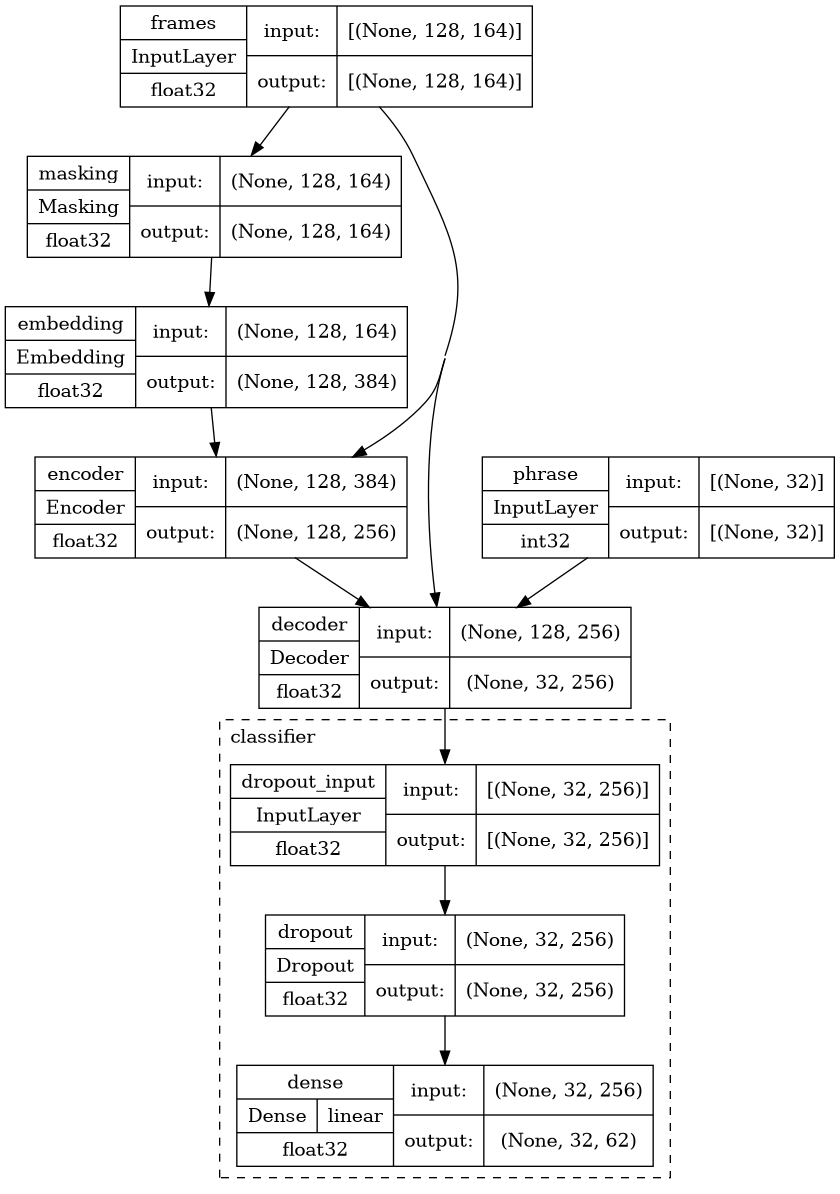

In [ ]:
# Plot Model Architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, show_layer_activations=True)

# Verify Training Flag
The function verify_correct_training_flag() assesses model behavior: confirming consistent output during inference and validating substantial variation (at least 99%) in output due to dropout during training. It compares predictions under training on and off to ensure expected behavior in both scenarios.

In [ ]:
def verify_correct_training_flag():
    # Verify static output for inference
    pred = model(X_batch_small, training=False)  # Get predictions with training off
    for _ in tqdm(range(10)):  # Iterate for validation
        assert tf.reduce_min(tf.cast(pred == model(X_batch_small, training=False), tf.int8)) == 1  # Check if inference output remains constant

    # Verify at least 99% varying output due to dropout during training
    for _ in tqdm(range(10)):  # Iterate for validation
        assert tf.reduce_mean(tf.cast(pred != model(X_batch_small, training=True), tf.float32)) > 0.99  # Check if training causes significant variation

verify_correct_training_flag()  # Execute the verification function

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

# Verify No NaN Predictions

100/100 [==============================] - 95s 923ms/step
# NaN Values In Predictions: 0


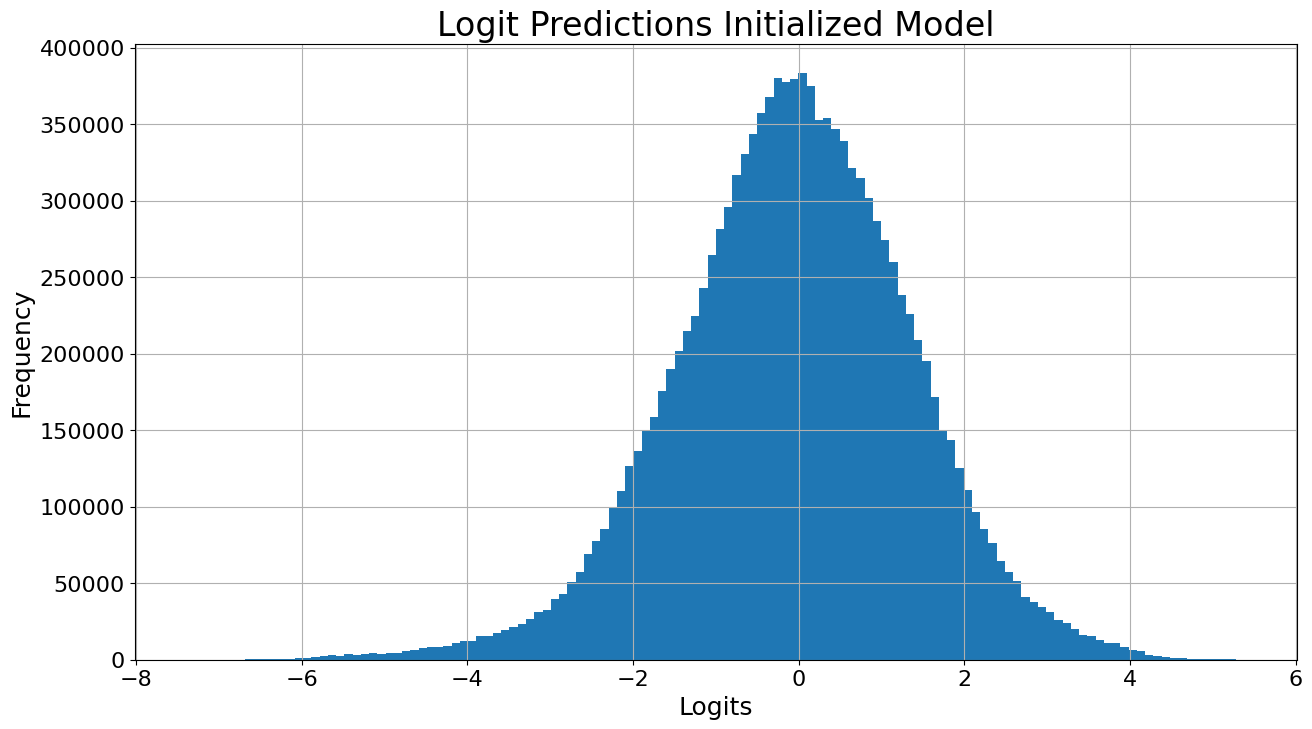

In [ ]:
# Verify No NaN predictions
def verify_no_nan_predictions():
    y_pred = model.predict(
        val_dataset if USE_VAL else train_dataset,
        steps=N_VAL_STEPS_PER_EPOCH if USE_VAL else 100,
        verbose=VERBOSE,
    )

    print(f'# NaN Values In Predictions: {np.isnan(y_pred).sum()}')

    plt.figure(figsize=(15,8))
    plt.title(f'Logit Predictions Initialized Model')
    pd.Series(y_pred.flatten()).plot(kind='hist', bins=128)
    plt.xlabel('Logits')
    plt.grid()
    plt.show()

verify_no_nan_predictions()

# Learning Rate Scheduler
This function computes the learning rate for each training step, implementing a warmup phase with either logarithmic or linear adjustments based on a specified warmup method. Following the warmup, it utilizes cosine annealing to adjust the learning rate throughout the training process.

In [ ]:
# Function to compute learning rate based on the current step
def lrfn(current_step, num_warmup_steps, lr_max, num_cycles=0.50, num_training_steps=N_EPOCHS):

    # If current step is less than warmup steps
    if current_step < num_warmup_steps:
        # Calculate learning rate based on warmup method
        if WARMUP_METHOD == 'log':
            return lr_max * 0.10 ** (num_warmup_steps - current_step)  # Logarithmic warmup
        else:
            return lr_max * 2 ** -(num_warmup_steps - current_step)  # Linear warmup
    else:
        # Calculate progress based on current step, warmup steps, and total training steps
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))

        # Calculate learning rate using cosine annealing after warmup
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress))) * lr_max  # Cosine annealing

The code defines a function to plot the learning rate schedule, generating a visual representation of how the learning rate changes over epochs. This function utilizes the LR_SCHEDULE list to plot the learning rates and annotations, enabling a comprehensive understanding of the learning rate's evolution during training.


The LR_SCHEDULE list is generated using a custom function lrfn applied over a range of epochs, and this schedule is then plotted and utilized as a callback for the learning rate during the model's training.

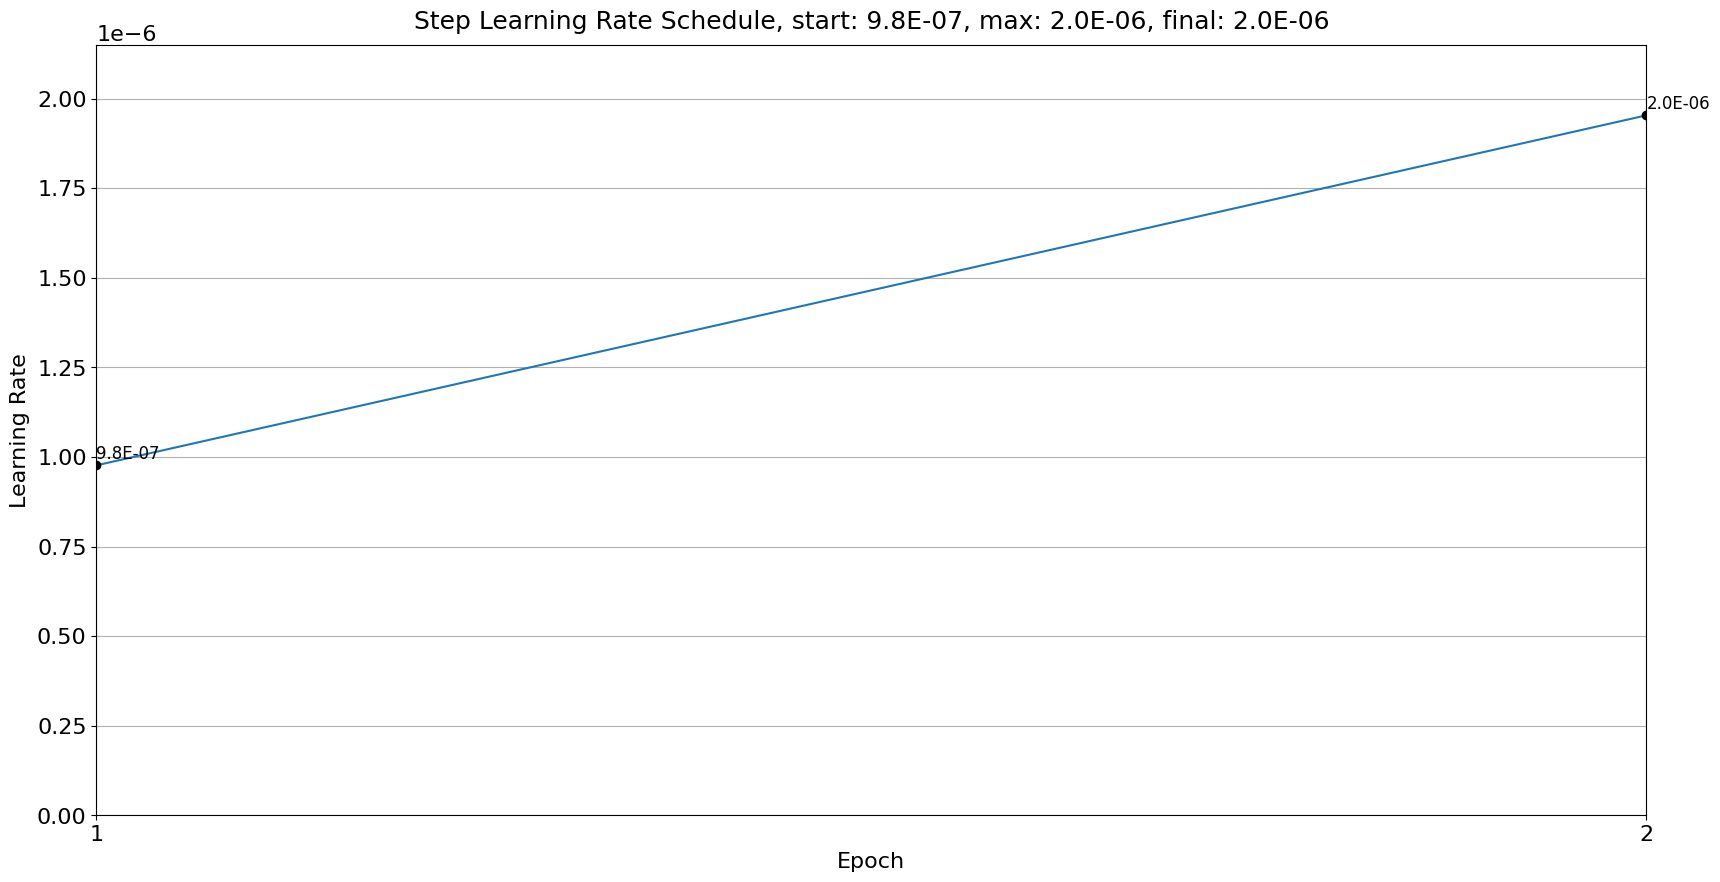

In [ ]:
def plot_lr_schedule(lr_schedule, epochs):
    fig = plt.figure(figsize=(20, 10))  # Create a figure with specific size for the learning rate plot
    plt.plot([None] + lr_schedule + [None])  # Plotting the learning rate schedule

    # X Labels configuration
    x = np.arange(1, epochs + 1)
    x_axis_labels = [i if epochs <= 40 or i % 5 == 0 or i == 1 else None for i in range(1, epochs + 1)]
    plt.xlim([1, epochs])  # Set x-axis limits
    plt.xticks(x, x_axis_labels)  # Set x-axis tick marks and labels

    plt.ylim([0, max(lr_schedule) * 1.1])  # Adjust y-axis limits for better readability

    # Title configuration
    schedule_info = f'start: {lr_schedule[0]:.1E}, max: {max(lr_schedule):.1E}, final: {lr_schedule[-1]:.1E}'
    plt.title(f'Step Learning Rate Schedule, {schedule_info}', size=18, pad=12)  # Set the plot title

    # Plotting Learning Rates with annotations
    for x, val in enumerate(lr_schedule):
        if epochs <= 40 or x % 5 == 0 or x is epochs - 1:
            if x < len(lr_schedule) - 1:
                if lr_schedule[x - 1] < val:
                    ha = 'right'
                else:
                    ha = 'left'
            elif x == 0:
                ha = 'right'
            else:
                ha = 'left'
            plt.plot(x + 1, val, 'o', color='black')  # Plot individual learning rates as dots
            offset_y = (max(lr_schedule) - min(lr_schedule)) * 0.02
            plt.annotate(f'{val:.1E}', xy=(x + 1, val + offset_y), size=12, ha=ha)  # Annotate the plotted points

    plt.xlabel('Epoch', size=16, labelpad=5)  # Set x-axis label
    plt.ylabel('Learning Rate', size=16, labelpad=5)  # Set y-axis label
    plt.grid()  # Enable grid in the plot
    plt.show()  # Show the plot

# Learning rate for encoder
LR_SCHEDULE = [lrfn(step, num_warmup_steps=N_WARMUP_EPOCHS, lr_max=LR_MAX, num_cycles=0.50) for step in range(N_EPOCHS)]
# Plot Learning Rate Schedule
plot_lr_schedule(LR_SCHEDULE, epochs=N_EPOCHS)  # Plot the learning rate schedule
# Learning Rate Callback
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda step: LR_SCHEDULE[step], verbose=0)  # Learning rate callback based on LR_SCHEDULE

# Weight Decay Callback
This custom callback, WeightDecayCallback, initializes with a weight decay ratio and updates the weight decay based on the learning rate at the beginning of each epoch during model training. It prints the current learning rate and weight decay for tracking purposes.

In [ ]:
# Custom callback to update weight decay with learning rate
class WeightDecayCallback(tf.keras.callbacks.Callback):
    def __init__(self, wd_ratio=WD_RATIO):  # Initializing the callback with a weight decay ratio
        self.step_counter = 0  # Counter to track steps
        self.wd_ratio = wd_ratio  # Weight decay ratio

    def on_epoch_begin(self, epoch, logs=None):  # Executed at the beginning of each epoch
        model.optimizer.weight_decay = model.optimizer.learning_rate * self.wd_ratio  # Updating weight decay
        print(f'learning rate: {model.optimizer.learning_rate.numpy():.2e}, weight decay: {model.optimizer.weight_decay.numpy():.2e}')  # Printing learning rate and weight decay

# Evaluate Initialized Model

In [ ]:
# Evaluate Initialized Model On Validation Data
y_pred = model.evaluate(
    val_dataset if USE_VAL else train_dataset,
    steps=N_VAL_STEPS_PER_EPOCH if USE_VAL else TRAIN_STEPS_PER_EPOCH,
    verbose=VERBOSE,
)

969/969 [==============================] - 919s 946ms/step - loss: 4.8756 - top1acc: 0.0196 - top5acc: 0.1004


# Baseline

In [ ]:
# baseline accuracy when only pad token is predicted
if USE_VAL:
    baseline_accuracy = np.mean(y_val == PAD_TOKEN)
else:
    baseline_accuracy = np.mean(y_train == PAD_TOKEN)
print(f'Baseline Accuracy: {baseline_accuracy:.4f}')

Baseline Accuracy: 0.4100


# Train

In [ ]:
gc.collect()

26120

In [ ]:
if TRAIN_MODEL:
    # Clear all models in GPU
    tf.keras.backend.clear_session()

    # Get new fresh model
    model = get_model()

    # Sanity Check
    model.summary()

    # Actual Training
    history = model.fit(
            x=train_dataset,
            steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
            epochs=N_EPOCHS,
            # Only used for validation data since training data is a generator
            validation_data=val_dataset if USE_VAL else None,
            validation_steps=N_VAL_STEPS_PER_EPOCH if USE_VAL else None,
            callbacks=[
                lr_callback,
                WeightDecayCallback(),
            ],
            verbose=VERBOSE,
        )

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 frames (InputLayer)         [(None, 128, 164)]           0         []                            
                                                                                                  
 masking (Masking)           (None, 128, 164)             0         ['frames[0][0]']              
                                                                                                  
 embedding (Embedding)       (None, 128, 384)             259968    ['masking[0][0]']             
                                                                                                  
 encoder (Encoder)           (None, 128, 256)             3643392   ['embedding[0][0]',           
                                                                     'frames[0][0]']          

In [ ]:
# Load Weights
if LOAD_WEIGHTS:
    model.load_weights('/kaggle/input/aslfr-training-python37/model.h5')
    print(f'Successfully Loaded Pretrained Weights')

In [ ]:
# Save Model Weights
model.save_weights('model.h5')

In [ ]:
# Verify Model is Loaded Correctly
model.evaluate(
    val_dataset if USE_VAL else train_dataset,
    steps=N_VAL_STEPS_PER_EPOCH if USE_VAL else TRAIN_STEPS_PER_EPOCH,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
)

969/969 [==============================] - 881s 907ms/step - loss: 3.3500 - top1acc: 0.1822 - top5acc: 0.5196


[3.3500020503997803, 0.1822226494550705, 0.519563615322113]

# Levenshtein Distance
The predict_phrase function employs TensorFlow's JIT compilation for optimization and inference, generating a sequence of tokens based on input frames by iteratively predicting each token until reaching the maximum phrase length. It utilizes a model to predict tokens and returns the output as a one-hot encoded tensor.

[Reference](https://www.geeksforgeeks.org/introduction-to-levenshtein-distance/)

In [ ]:
# Output Predictions to string
def outputs2phrase(outputs):
    if outputs.ndim == 2:
        outputs = np.argmax(outputs, axis=1)

    return ''.join([ORD2CHAR.get(s, '') for s in outputs])

In [ ]:
@tf.function(jit_compile=True)
def predict_phrase(frames):
    # Add Batch Dimension
    frames = tf.expand_dims(frames, axis=0)
    # Start Phrase
    phrase = tf.fill([1, MAX_PHRASE_LENGTH], PAD_TOKEN)

    for idx in tf.range(MAX_PHRASE_LENGTH):
        # Cast phrase to int8
        phrase = tf.cast(phrase, tf.int8)
        # Predict Next Token
        outputs = model({
            'frames': frames,
            'phrase': phrase,
        })

        # Add predicted token to input phrase
        phrase = tf.cast(phrase, tf.int32)
        phrase = tf.where(
            tf.range(MAX_PHRASE_LENGTH) < idx + 1,
            tf.argmax(outputs, axis=2, output_type=tf.int32),
            phrase,
        )

    # Squeeze outputs
    outputs = tf.squeeze(phrase, axis=0)
    outputs = tf.one_hot(outputs, N_UNIQUE_CHARACTERS)

    # Return a dictionary with the output tensor
    return outputs

# The function `predict_phrase` uses TensorFlow's JIT compilation for optimization and inference.
# It takes frames as input, expands them with a batch dimension, initializes a phrase, and iterates through the maximum phrase length.
# At each iteration, it predicts the next token using a model and appends it to the phrase until the maximum length is reached.
# Finally, it converts the output to one-hot encoding and returns it.

# Levenstein Distance Train
This function get_ld_train() computes Levenshtein distances between predicted and true phrases for a training dataset, storing the results in a DataFrame. It iterates through the data, predicting phrases and calculating distances while handling interactive mode for smaller subsets.

In [ ]:
# Compute Levenshtein Distances function definition
def get_ld_train():
    # Set N to 100 if IS_INTERACTIVE is true, else set it to 1000
    N = 100 if IS_INTERACTIVE else 1000
    # Initialize an empty list to store Levenshtein distance calculations for training data
    LD_TRAIN = []
    # Loop through the data with a total count of N, using tqdm for progress visualization
    for idx, (frames, phrase_true) in enumerate(zip(tqdm(X_train, total=N), y_train)):
        # Predict the phrase and convert it to a numpy array
        phrase_pred = predict_phrase(frames).numpy()
        # Convert the predicted phrase to a string
        phrase_pred = outputs2phrase(phrase_pred)
        # Convert the true phrase's ordinal representation to a string
        phrase_true = outputs2phrase(phrase_true)
        # Calculate Levenshtein distance and store relevant information in a dictionary
        LD_TRAIN.append({
            'phrase_true': phrase_true,
            'phrase_true_len': len(phrase_true),
            'phrase_pred': phrase_pred,
            'levenshtein_distance': levenshtein(phrase_pred, phrase_true),
        })
        # Break the loop if in interactive mode and the index reaches N
        if idx == N:
            break

    # Convert the list of dictionaries to a DataFrame
    LD_TRAIN_DF = pd.DataFrame(LD_TRAIN)

    # Return the DataFrame containing Levenshtein distances for training data
    return LD_TRAIN_DF

In [ ]:
LD_TRAIN_DF = get_ld_train()

# Display Errors
display(LD_TRAIN_DF.head(30))

  0%|          | 0/100 [00:00<?, ?it/s]

,phrase_true,phrase_true_len,phrase_pred,levenshtein_distance
0,3 creekhouse,12,+33-33--3-3-1-3-3-3-3-3,22
1,scales/kuhaylah,15,+32-20-3-3-3,15
2,hentaihubs.com,14,+44-444-4444,14
3,1383 william lanier,19,+99-99-9-999-9-9-9-99,21
4,988 franklin lane,17,+32-28-8-8-8,17
5,6920 northeast 661st road,25,+38-888-888-0-8-8-8,25
6,www.freem.ne.jp,15,+35-000-0-0-0-0,15
7,https://jsi.is/hukuoka,22,+32-21-1-1-1,22
8,239613 stolze street,20,www.ththththtthttthtthtthththtt,28
9,242-197-6202,12,www.sthesthesth sth st,22


The code first generates a dictionary to count occurrences of each Levenshtein distance value in the training dataset, then calculates the normalized Levenshtein distance as an evaluation metric. Finally, it visualizes the distribution of Levenshtein distances in the training data using a bar plot, incorporating the mean Levenshtein distance and the calculated normalized Levenshtein distance.

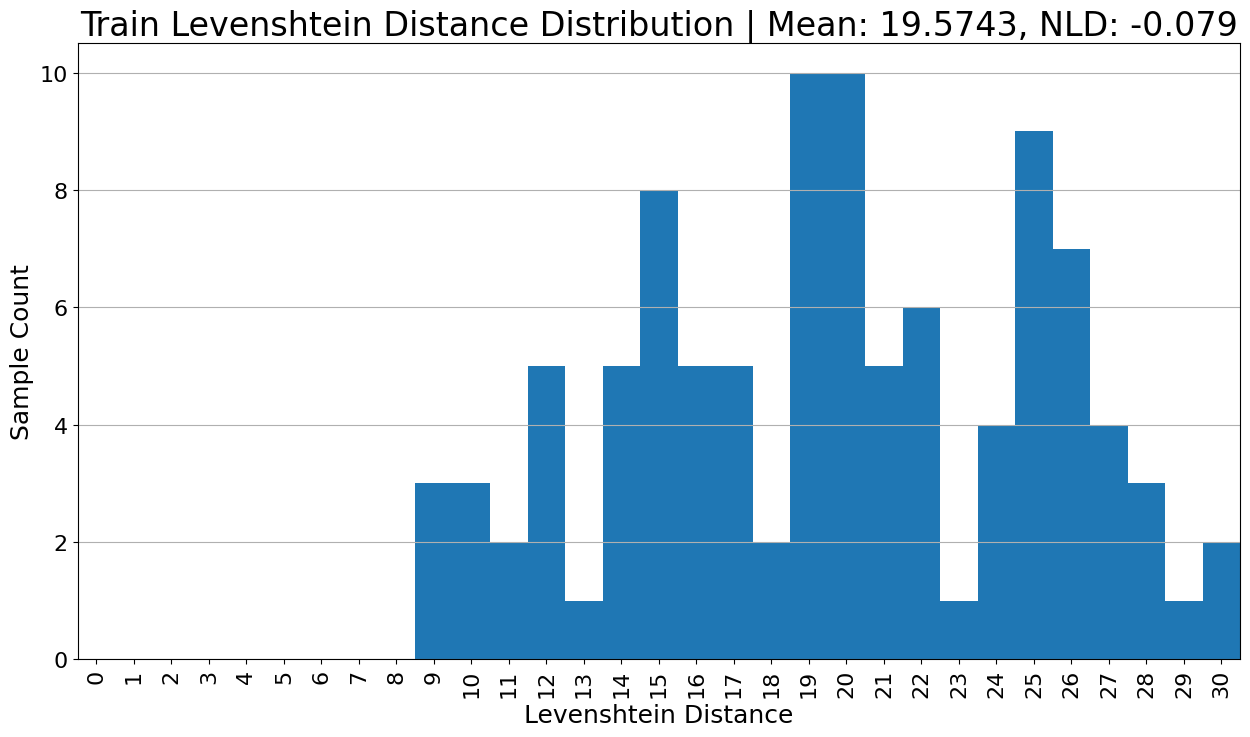

In [ ]:
# Value Counts
# Initialize a dictionary to count the occurrences of each Levenshtein distance value in the training dataset
LD_TRAIN_VC = dict([(i, 0) for i in range(LD_TRAIN_DF['levenshtein_distance'].max()+1)])

# Loop through the Levenshtein distances in the training dataset and increment corresponding counts in the dictionary
for ld in LD_TRAIN_DF['levenshtein_distance']:
    LD_TRAIN_VC[ld] += 1

# Evaluation Metric
# Calculate the evaluation metric, normalized Levenshtein distance, based on the training dataset values
N = LD_TRAIN_DF['phrase_true_len'].sum()
D = LD_TRAIN_DF['levenshtein_distance'].sum()
nld = (N - D) / N

# Visualize the distribution of Levenshtein distances in the training dataset using a bar plot
plt.figure(figsize=(15,8))
pd.Series(LD_TRAIN_VC).plot(kind='bar', width=1)
plt.title(f'Train Levenshtein Distance Distribution | Mean: {LD_TRAIN_DF.levenshtein_distance.mean():.4f}, NLD: {nld:.3f}')
plt.xlabel('Levenshtein Distance')
plt.ylabel('Sample Count')
plt.xlim(-0.50, LD_TRAIN_DF.levenshtein_distance.max()+0.50)
plt.grid(axis='y')
plt.savefig('temp.png')  # Save the plot as 'temp.png'
plt.show()  # Display the plot

# Levenstein Distance Evaluation
This function computes Levenshtein distances between predicted and true phrases based on input frames. It iterates through the validation data, predicts phrases, calculates the Levenshtein Distance, and stores the results in a DataFrame, adjusting the number of iterations based on an interactive mode flag.

In [ ]:
# Compute Levenstein Distances
def get_ld_val():
    # Set the number of iterations based on interactive mode
    N = 100 if IS_INTERACTIVE else 1000
    # Initialize an empty list to store results
    LD_VAL = []
    # Iterate through validation data
    for idx, (frames, phrase_true) in enumerate(zip(tqdm(X_val, total=N), y_val)):
        # Predict the phrase and convert it to a string
        phrase_pred = predict_phrase(frames).numpy()
        phrase_pred = outputs2phrase(phrase_pred)
        # Convert true phrase ordinal to string
        phrase_true = outputs2phrase(phrase_true)
        # Calculate Levenshtein Distance and store information
        LD_VAL.append({
            'phrase_true': phrase_true,
            'phrase_true_len': len(phrase_true),
            'phrase_pred': phrase_pred,
            'levenshtein_distance': levenshtein(phrase_pred, phrase_true),
        })
        # Break loop in interactive mode after N iterations
        if idx == N:
            break

    # Convert results to a DataFrame
    LD_VAL_DF = pd.DataFrame(LD_VAL)

    return LD_VAL_DF


In [ ]:
if USE_VAL:
    LD_VAL_DF = get_ld_val()

    # Display Errors
    display(LD_VAL_DF.head(30))

In [ ]:
# Value Counts
if USE_VAL:
    # Evaluation Metric
    N = LD_VAL_DF['phrase_true_len'].sum()
    D = LD_VAL_DF['levenshtein_distance'].sum()
    nld = (N - D) / N

    LD_VAL_VC = dict([(i, 0) for i in range(LD_VAL_DF['levenshtein_distance'].max()+1)])
    for ld in LD_VAL_DF['levenshtein_distance']:
        LD_VAL_VC[ld] += 1

    plt.figure(figsize=(15,8))
    pd.Series(LD_VAL_VC).plot(kind='bar', width=1)
    plt.title(f'Validation Levenstein Distance Distribution | Mean: {LD_VAL_DF.levenshtein_distance.mean():.4f}, NLD: {nld:.3f}')
    plt.xlabel('Levenstein Distance')
    plt.ylabel('Sample Count')
    plt.xlim(-0.50, LD_VAL_DF.levenshtein_distance.max()+0.50)
    plt.grid(axis='y')
    plt.savefig('temp.png')
    plt.show()

# Training History
This function plot_history_metric is designed to visualize training history metrics, allowing flexible configurations for plotting various metrics over epochs. It handles the plotting of training and validation metrics if available, highlighting the best values for each. The function supports customization of axis scales, limits, and tick styles for effective visualization.

In [ ]:
# Define a function to plot training history metrics with various configurations
def plot_history_metric(metric, f_best=np.argmax, ylim=None, yscale=None, yticks=None):
    # Check if we're in training mode, if not, exit the function
    if not TRAIN_MODEL:
        return

    # Create a figure for plotting with specified dimensions
    plt.figure(figsize=(20, 10))

    # Extract values for the specified metric from the history object
    values = history.history[metric]
    # Get the total number of epochs
    N_EPOCHS = len(values)
    # Check if validation data exists in the history
    val = 'val' in ''.join(history.history.keys())

    # Determine the x-axis ticks based on the number of epochs
    if N_EPOCHS <= 20:
        x = np.arange(1, N_EPOCHS + 1)
    else:
        x = [1, 5] + [10 + 5 * idx for idx in range((N_EPOCHS - 10) // 5 + 1)]

    x_ticks = np.arange(1, N_EPOCHS + 1)

    # If validation data exists, extract and plot the validation metric values
    if val:
        val_values = history.history[f'val_{metric}']
        val_argmin = f_best(val_values)
        plt.plot(x_ticks, val_values, label=f'val')

    # Plot the training metric values
    plt.plot(x_ticks, values, label=f'train')
    argmin = f_best(values)
    plt.scatter(argmin + 1, values[argmin], color='red', s=75, marker='o', label=f'train_best')

    # Plot the best validation metric values, if validation data exists
    if val:
        plt.scatter(val_argmin + 1, val_values[val_argmin], color='purple', s=75, marker='o', label=f'val_best')

    # Set title and labels for the plot
    plt.title(f'Model {metric}', fontsize=24, pad=10)
    plt.ylabel(metric, fontsize=20, labelpad=10)

    # Set y-axis limit if specified
    if ylim:
        plt.ylim(ylim)

    # Set y-axis scale if specified
    if yscale is not None:
        plt.yscale(yscale)

    # Set y-axis ticks if specified
    if yticks is not None:
        plt.yticks(yticks, fontsize=16)

    # Set x-axis label and ticks
    plt.xlabel('epoch', fontsize=20, labelpad=10)
    plt.tick_params(axis='x', labelsize=8)
    plt.xticks(x, fontsize=16)
    plt.yticks(fontsize=16)

    # Display legend, grid, and show the plot
    plt.legend(prop={'size': 10})
    plt.grid()
    plt.show()

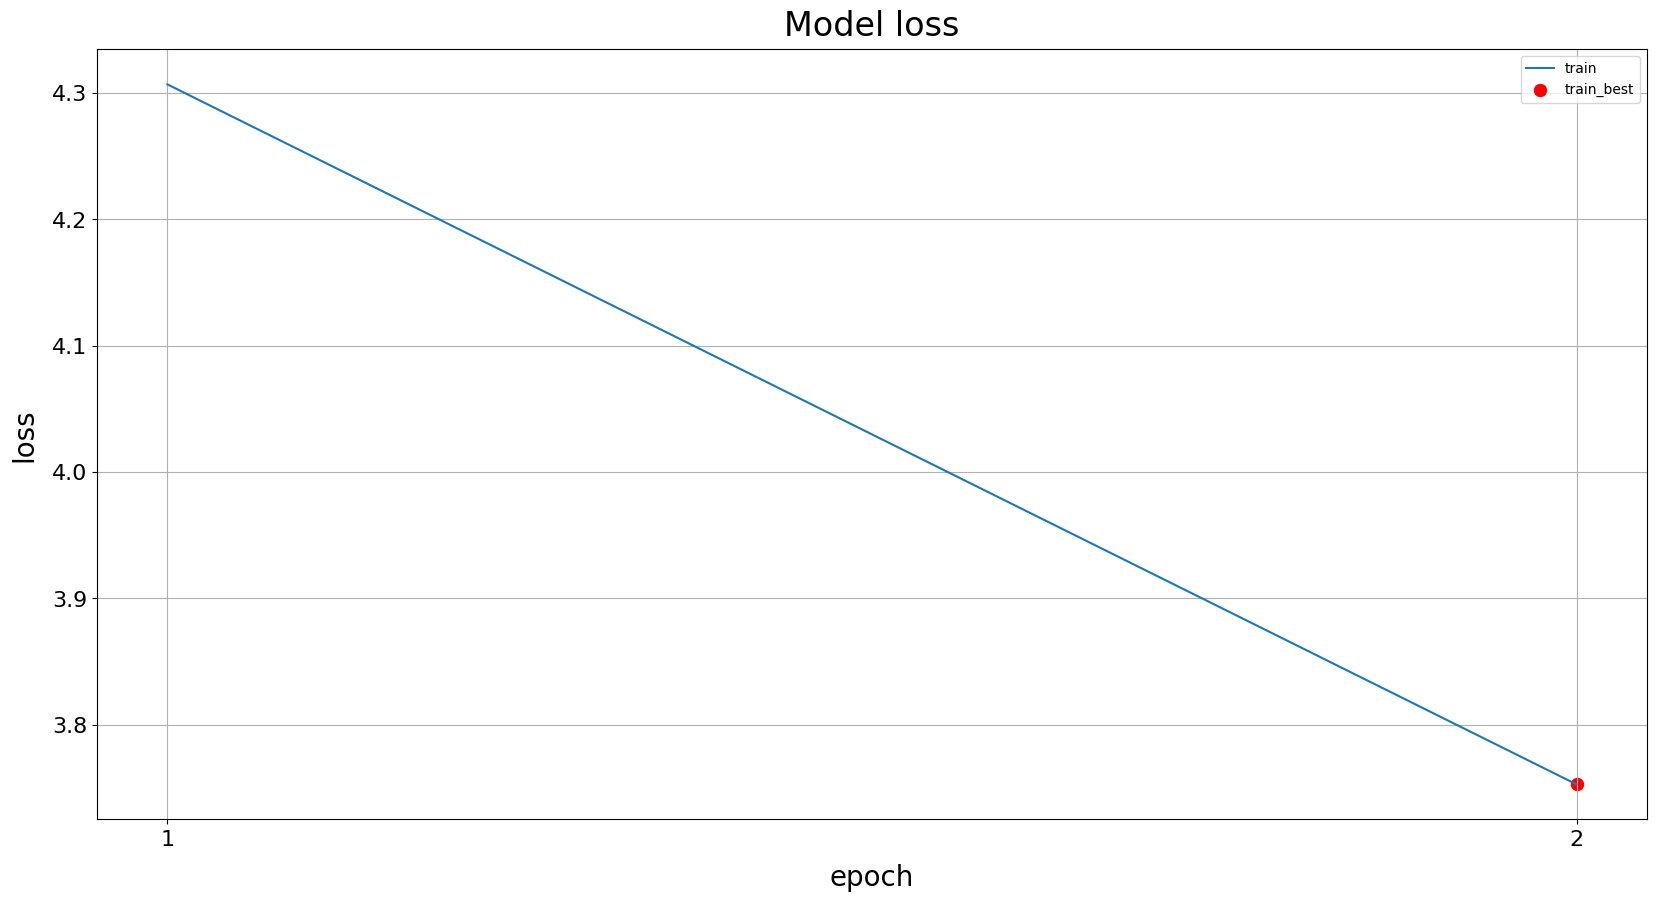

In [ ]:
plot_history_metric('loss', f_best=np.argmin)

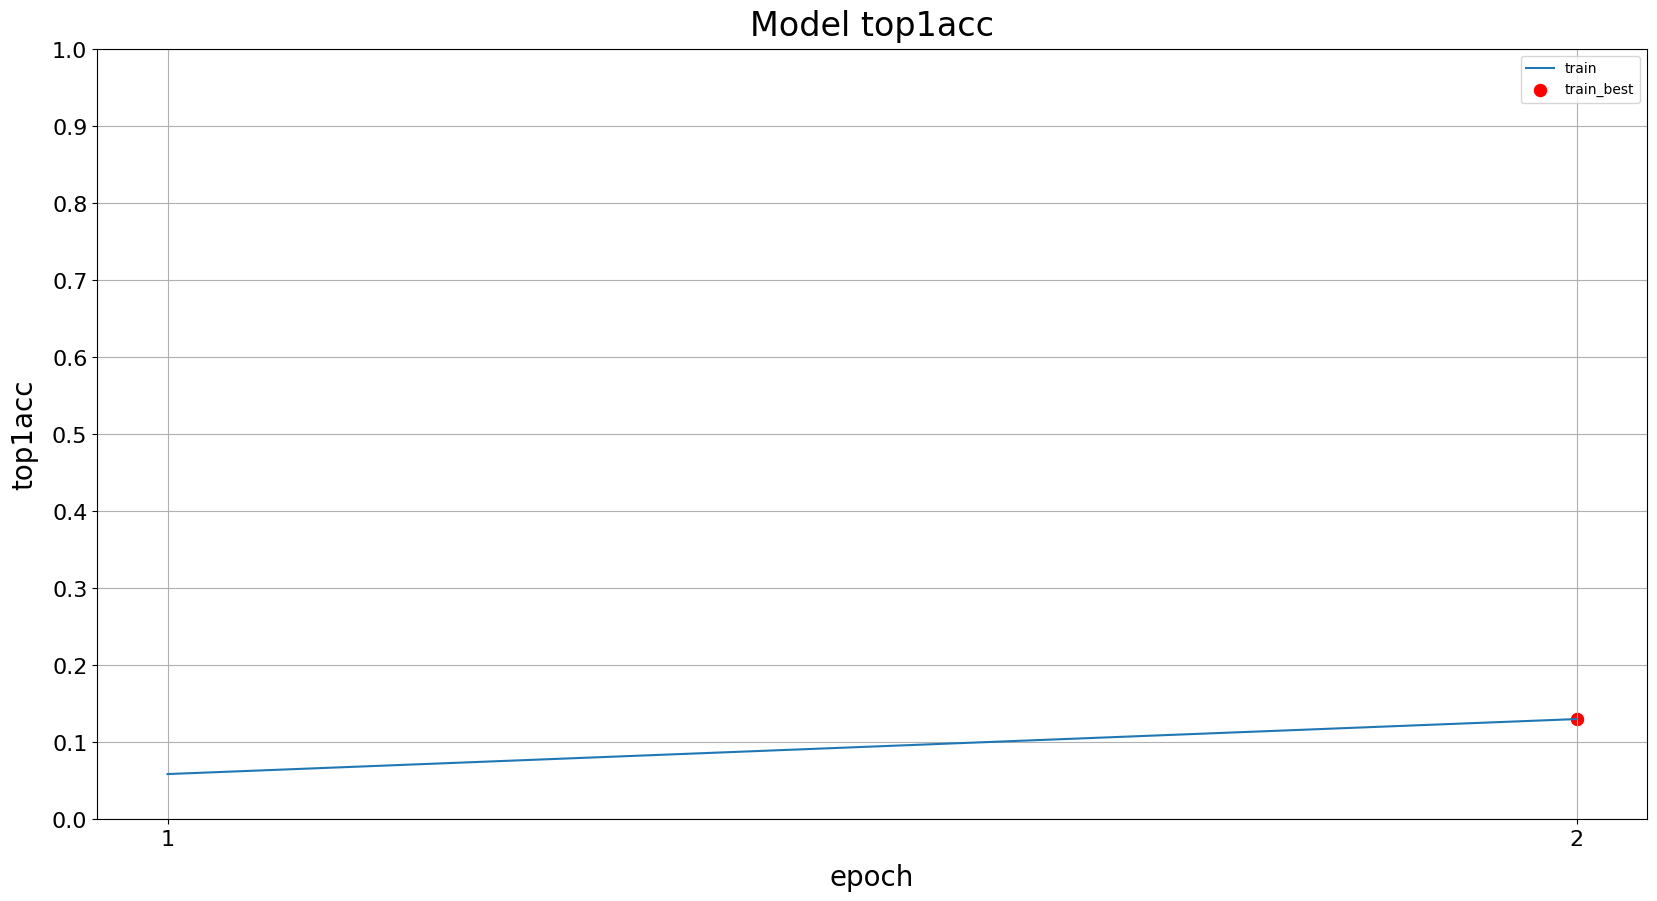

In [ ]:
plot_history_metric('top1acc', ylim=[0,1], yticks=np.arange(0.0, 1.1, 0.1))

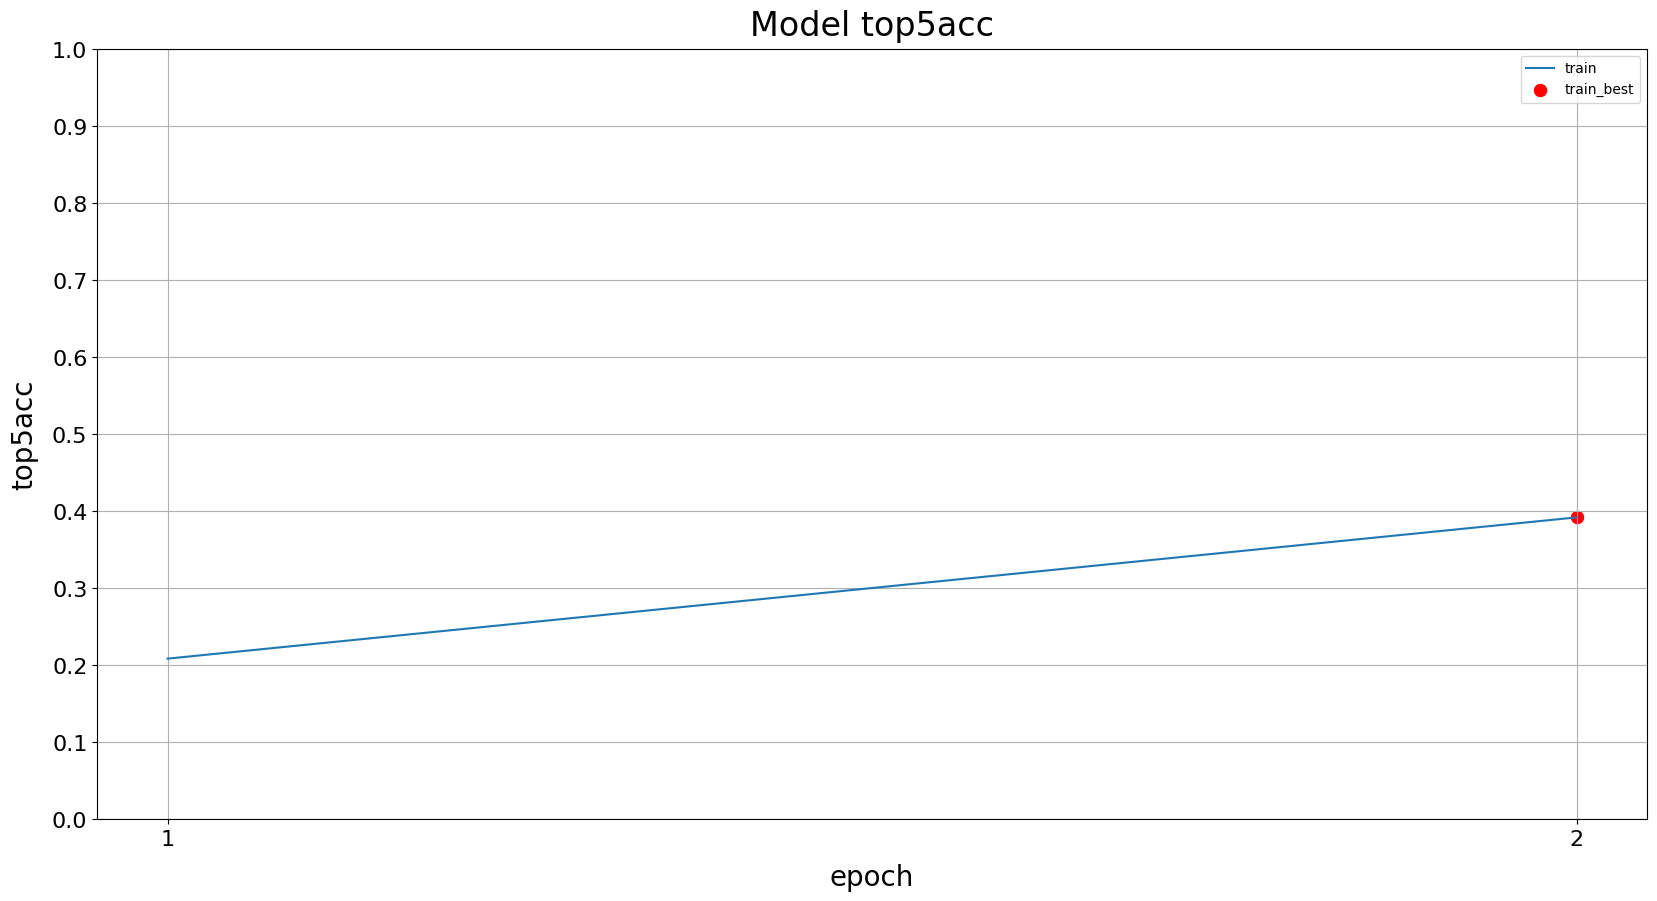

In [ ]:
plot_history_metric('top5acc', ylim=[0,1], yticks=np.arange(0.0, 1.1, 0.1))

# Inference

In [ ]:
# Model Layer Names
for l in model.layers:
    print(l.name)

frames
masking
embedding
encoder
phrase
decoder
classifier


This code defines a TFLite model class for inference, handling encoding, decoding, and predicting characters one token at a time based on the previous prediction. It showcases a demo by processing data and comparing the model's output with the true phrase.

In [ ]:
# TFLite model definition for submission
class TFLiteModel(tf.Module):
    def __init__(self, model):
        super(TFLiteModel, self).__init__()

        # Load the feature generation and main models
        self.preprocess_layer = preprocess_layer  # Initializing feature generation
        self.model = model  # Initializing the main model

    @tf.function(jit_compile=True)  # Decorator for compiling the function
    def encoder(self, x, frames_inp):  # Method to encode input frames
        x = self.model.get_layer('embedding')(x)  # Retrieve and apply the 'embedding' layer
        x = self.model.get_layer('encoder')(x, frames_inp)  # Encode using the 'encoder' layer

        return x  # Return the encoded output

    @tf.function(jit_compile=True)  # Decorator for compiling the function
    def decoder(self, x, phrase_inp, frames_inp):  # Method to decode and predict
        x = self.model.get_layer('decoder')(x, phrase_inp, frames_inp)  # Decode using the 'decoder' layer
        x = self.model.get_layer('classifier')(x)  # Use 'classifier' layer for prediction

        return x  # Return the decoded output

    @tf.function(input_signature=[tf.TensorSpec(shape=[None, N_COLS0], dtype=tf.float32, name='inputs')])
    def __call__(self, inputs):  # Call method to perform inference
        # Number Of Input Frames
        N_INPUT_FRAMES = tf.shape(inputs)[0]  # Get the number of input frames
        # Preprocess Data
        frames_inp = self.preprocess_layer(inputs)  # Preprocess the input frames
        # Add Batch Dimension
        frames_inp = tf.expand_dims(frames_inp, axis=0)  # Add a batch dimension to the frames
        # Get Encoding
        encoding = self.encoder(frames_inp, frames_inp)  # Obtain the encoded representation
        # Make Prediction
        phrase = tf.fill([1,MAX_PHRASE_LENGTH], PAD_TOKEN)  # Create placeholder for predicted phrase
        # Predict One Token At A Time
        stop = False  # Flag to stop predicting
        for idx in tf.range(MAX_PHRASE_LENGTH):  # Loop for predicting tokens
            # Cast phrase to int8
            phrase = tf.cast(phrase, tf.int8)  # Cast the phrase to int8
            # If EOS token is predicted, stop predicting
            outputs = tf.cond(
                stop,
                lambda: tf.one_hot(tf.cast(phrase, tf.int32), N_UNIQUE_CHARACTERS),
                lambda: self.decoder(encoding, phrase, frames_inp)
            )
            # Add predicted token to input phrase
            phrase = tf.cast(phrase, tf.int32)  # Cast phrase to int32
            # Replace PAD token with predicted token up to idx
            phrase = tf.where(
                tf.range(MAX_PHRASE_LENGTH) < idx + 1,
                tf.argmax(outputs, axis=2, output_type=tf.int32),
                phrase,
            )
            # Predicted Token
            predicted_token = phrase[0,idx]  # Get the predicted token
            # If EOS (End Of Sentence) token is predicted, stop
            if not stop:
                stop = predicted_token == EOS_TOKEN

        # Squeeze outputs
        outputs = tf.squeeze(phrase, axis=0)  # Remove extra dimensions
        outputs = tf.one_hot(outputs, N_UNIQUE_CHARACTERS)  # One-hot encode the output tokens

        # Return a dictionary with the output tensor
        return {'outputs': outputs }

# Define TF Lite Model
tflite_keras_model = TFLiteModel(model)  # Instantiate the TFLite model

# Sanity Check
# demo_sequence_id = 1816796431
demo_sequence_id = example_parquet_df.index.unique()[0]  # Get a demo sequence ID
demo_raw_data = example_parquet_df.loc[demo_sequence_id, COLUMNS0].values  # Get demo raw data
demo_phrase_true = train_sequence_id.loc[demo_sequence_id, 'phrase']  # Get true demo phrase
print(f'demo_raw_data shape: {demo_raw_data.shape}, dtype: {demo_raw_data.dtype}')  # Display demo data info
demo_output = tflite_keras_model(demo_raw_data)['outputs'].numpy()  # Get demo model output
print(f'demo_output shape: {demo_output.shape}, dtype: {demo_output.dtype}')  # Display demo output info
print(f'demo_outputs phrase decoded: {outputs2phrase(demo_output)}')  # Decode demo output
print(f'phrase true: {demo_phrase_true}')  # Display true demo phrase

demo_raw_data shape: (94, 164), dtype: float32
demo_output shape: (32, 62), dtype: float32
demo_outputs phrase decoded: 222-288-2222
phrase true: juliana pacheco


The code creates a TensorFlow Lite converter, uses it to convert a Keras model into TensorFlow Lite format, and then saves the resulting TensorFlow Lite model as a file named 'model.tflite'

In [ ]:
# Create Model Converter
keras_model_converter = tf.lite.TFLiteConverter.from_keras_model(tflite_keras_model)

# Convert Model
tflite_model = keras_model_converter.convert()

# Write Model
with open('/kaggle/working/model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Add selected_columns json to only select specific columns from input frames
with open('inference_args.json', 'w') as f:
     json.dump({ 'selected_columns': COLUMNS0.tolist() }, f)

In [ ]:
# Zip Model
!zip submission.zip /kaggle/working/model.tflite /kaggle/working/inference_args.json

  adding: kaggle/working/model.tflite (deflated 10%)
  adding: kaggle/working/inference_args.json (deflated 83%)
